#**Trabalho de Mineração de dados**


**Alunos:** Halliday Gauss e Guilherme Augusto



# **O Problema:** Spaceship Titanic

No ano de 2912, foi recebido uma transmissão de quatro anos-luz de distância.

A nave espacial Titanic com quase 13.000 passageiros a bordo, partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Durante o percurso a nave colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!

Para ajudar as equipes de resgate e recuperar os passageiros perdidos, você é desafiado a prever quais passageiros foram transportados pela anomalia usando registros recuperados do sistema de computador danificado da nave espacial.



# **Motivação:** 

Deseja-se ajudar a salvar os seres humanos e mudar a história !

Após uma análise dessa base de dados tirada do Kaggle é possível perceber dados inconsistentes, irrelavantes e nulos. Portanto, é uma boa oportunidade para treinar os conhecimentos de Mineração de Dados e uma posterior Classificação (predição) através de algoritmos de Inteligência Artificial.

# Objetivo:

O objetivo do trabalho é realizar a mineração dos dados na base de dados, de maneira que os mesmos se tornem úteis para que a aplicação de um algoritmo de classificação seja eficiente e aceitável.

Através de um conjunto de teste deve-se realizar a predição dos dados, visando saber se os passageiros foram parar em outra dimensão ou não.

#Descrição dos Atributos
------------------------------------------------------------------------

**PassengerId** 

 - Um ID exclusivo para cada passageiro.

 - Atributo Categórico Ordinal

------------------------------------------------------------------------

**HomePlanet** 
- O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.
- Atributo Categórico Nominal

------------------------------------------------------------------------
**CryoSleep** 
- Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem.
- Atributo Binário Simétrico

------------------------------------------------------------------------

**Cabin** 
- O número da cabine onde o passageiro está hospedado.
- Atributo Categórico Ordinal

------------------------------------------------------------------------

**Destination** 
- O planeta para o qual o passageiro irá desembarcar.
- Atributo Categórico Nominal
------------------------------------------------------------------------

**Age** 
- A idade do passageiro.
- Atributo Discreto

------------------------------------------------------------------------

**VIP** 
- Se o passageiro pagou pelo serviço VIP especial durante a viagem.
- Atributo Binário Simétrico

------------------------------------------------------------------------

**RoomService** 
- Valor que o passageiro cobrou pelo serviço de quarto.
- Atributo Contínuo

------------------------------------------------------------------------

**FoodCourt** 
- Valor que o passageiro gastou na praça de alimentação.
- Atributo Contínuo

------------------------------------------------------------------------

**ShoppingMall** 
- Valor que o passageiro gastou no shopping.
- Atributo Contínuo

------------------------------------------------------------------------

**Spa** 
- Valor que o passageiro gastou no spa.
- Atributo Contínuo

------------------------------------------------------------------------
**VRDeck** 
- Valor que o passageiro gastou no deck de RV.
- Atributo Contínuo

------------------------------------------------------------------------

**Name** 
- O nome do passageiro.
- Atributo Categórico Nominal
------------------------------------------------------------------------

**Transported** 
- Se o passageiro foi transportado para outra dimensão.
- Atributo Binário Simétrico (O que deve ser predito)
------------------------------------------------------------------------

#Importações

In [3]:
# Bibliotecas processamento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#Biblioteca seaborn
import seaborn as sns

from sklearn.impute import SimpleImputer # Fit e Transform em dados nulos
from sklearn.preprocessing import OneHotEncoder # Fazer one hot encoder
from sklearn.preprocessing import LabelEncoder #Label Enconder substitui as classes por números.
from sklearn import preprocessing # Para fazer a normalização dos dados


from mlxtend.frequent_patterns import apriori # Biblioteca para encontrar transações frequentes
from mlxtend.frequent_patterns import association_rules # Biblioteca para gerar as regras de associação
from mlxtend.preprocessing import TransactionEncoder # Para fazer o One Hot

# Ler base de dados

In [4]:
df = pd.read_csv("train.csv")

In [5]:
# Tamanho da base de Dados
tamanho_do_df = len(df.index)
print("Tamanho da base de dados:", tamanho_do_df, "\n\n")

print("Algumas instâncias da base de dados:")
df.head()

Tamanho da base de dados: 8693 


Algumas instâncias da base de dados:


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

# Funções Auxiliares

Função que vai gerar um gráfico de pizza dos atributos nominais.

In [6]:
def plotar_grafico_de_pizza_nominal(df, nome_do_atributo, titulo = None):

  rotulos = list(df[nome_do_atributo].unique())

  data = [df[nome_do_atributo].eq(rot).sum() for rot in rotulos]

  if df[nome_do_atributo].isnull().sum() > 0:
    data[-1] = df[nome_do_atributo].isnull().sum() 
  
  if titulo is None:
    titulo = "Distribuição do atributo - " + nome_do_atributo

  explode = [0.1*i for i in range(len(rotulos))]

  wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  fig, ax = plt.subplots(figsize =(10, 7)) 
  wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = rotulos, 
                                  shadow = True,  
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  ax.legend(wedges, rotulos, 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
  plt.setp(autotexts, size = 8, weight ="bold") 
  ax.set_title(titulo) 
  plt.show() 
  plt.show() 

Função que vai plotar o gráfico de pizza da quantidade de atributos nulos e não nulos.

In [7]:
def plotar_grafico_de_pizza_nulos(df, nome_do_atributo):

  print("\nGráfico de Pizza - Valores Nulos - " + nome_do_atributo)
  titulo = "\nGráfico de Pizza - Valores Nulos - " + nome_do_atributo
  nulos = ['Nulos', 'Não Nulos'] 
  data = [df[nome_do_atributo].isnull().sum(), df[nome_do_atributo].count()] 

  explode = (0.1, 0.0) 
  colors = ("beige", "orange") 
  wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  fig, ax = plt.subplots(figsize =(10, 7)) 
  wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = nulos, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  ax.legend(wedges, nulos, 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
  plt.setp(autotexts, size = 8, weight ="bold") 
  ax.set_title(titulo) 
  plt.show() 
  plt.show() 

Função que vai fazer a análise estatística do atributo.

In [8]:
def analise_estatistica_atributo(df, nome_do_atributo): 
  # Analisar Atributo - Age
  print("Análise Estatística do atributo -", nome_do_atributo)
  print("Valor médio:", round(df[nome_do_atributo].mean(),2))
  print("Valor máximo:",round(df[nome_do_atributo].max(), 2))
  print("Valor mínimo:", round(df[nome_do_atributo].min(), 2))
  print("Valor desvio padrão:", round(df[nome_do_atributo].std(), 2))
  print("25% do valores contidos até:", round(df[nome_do_atributo].describe()[4], 2))
  print("50% do valores contidos até:", round(df[nome_do_atributo].describe()[5], 2))
  print("75% do valores contidos até:", round(df[nome_do_atributo].describe()[6], 2))

Função que vai plotar o histograma de um atributo.

In [9]:
def plotar_histograma_atributo(df, nome_do_atributo):
  print("Histograma")

  plt.title("Histograma - " + nome_do_atributo, fontsize=20)
  plt.xlabel(nome_do_atributo)
  plt.ylabel('Quantidade')
  plt.hist(df[nome_do_atributo], rwidth=0.9)

  plt.show()

Função que vai plotar o gráfico de dispersão de um atributo.

In [10]:
def plotar_grafico_de_dispersao_atributo(df, nome_do_atributo):
  print("\nGráfico de Dispersão")
  plt.scatter(df[nome_do_atributo], range(len(df[nome_do_atributo])))
  plt.xlabel(nome_do_atributo)
  plt.ylabel('Instância')
  plt.title('Gráfico de Dispersão - ' + nome_do_atributo)
  plt.show()

Função que vai plotar relação do atributo com o rótulo através de um bloxplot.

In [11]:
def plotar_relacao_atributo_rotulo_bloxplot(df, nome_do_atributo):
  print("\nRelação do atributo " + nome_do_atributo + " com o Rótulo")
  df.boxplot(by='Transported', column = nome_do_atributo)


Função que vai plotar relação do atributo com o rótulo através de um gráfico de barras.

In [12]:
def plotar_relacao_atributo_rotulo_barras(df, nome_do_atributo):
  print("\nRelação do atributo " + nome_do_atributo + " com o Rótulo")

  transported = df[df.Transported == True]
  not_transported = df[df.Transported == False]

  transported = transported[nome_do_atributo]
  not_transported = not_transported[nome_do_atributo]

  plt.figure(figsize=(8, 6))
  plt.title('Distribuição do atributo ' + nome_do_atributo)
  plt.xlabel(nome_do_atributo)
  plt.ylabel('Quantidade de pessoas')
  plt.hist(transported,
          alpha=0.5, label='Transportado', color='#FF26E1')
  plt.hist(not_transported,
          alpha=0.5, label='Não Transportado', color='#2DB200')
  plt.legend(loc='upper right')

Função que vai analisar a unicidade de cada valor do atributo.

In [13]:
def unicidade(df, nome_do_atributo):
  print("Unicidade -", nome_do_atributo)
  print("Quantidades únicas:" , len(df[nome_do_atributo].unique()))

Função que vai plotar a relação de cada possível valor do atributo nominal com o rótulo.

In [14]:
def plotar_relacao_atributo_rotulo_pizza(df, nome_do_atributo):
  print("Relação do atributo", nome_do_atributo, " com o Rótulo")

  rotulos = list(df[nome_do_atributo].unique())

  for rotulo in rotulos:
    plotar_grafico_de_pizza_nominal(df[df[nome_do_atributo].eq(rotulo)], "Transported", "Gráfico de Distribuição do atributo - " +
                                    nome_do_atributo + " - " + str(rotulo) + " em relação ao rótulo Transported")
    print("\n")

# Análise dos Atributos Numéricos

Analisar -> Idade - Age

In [15]:
analise_estatistica_atributo(df, "Age")

Análise Estatística do atributo - Age
Valor médio: 28.83
Valor máximo: 79.0
Valor mínimo: 0.0
Valor desvio padrão: 14.49
25% do valores contidos até: 19.0
50% do valores contidos até: 27.0
75% do valores contidos até: 38.0


Histograma


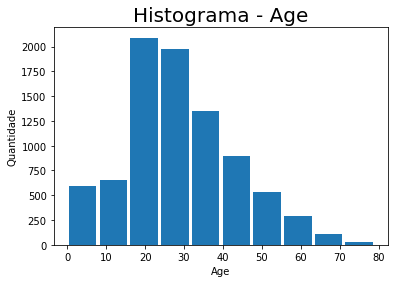

In [16]:
plotar_histograma_atributo(df, "Age")

Existem mais pessoas entre 20 e 40 anos.


Gráfico de Pizza - Valores Nulos - Age


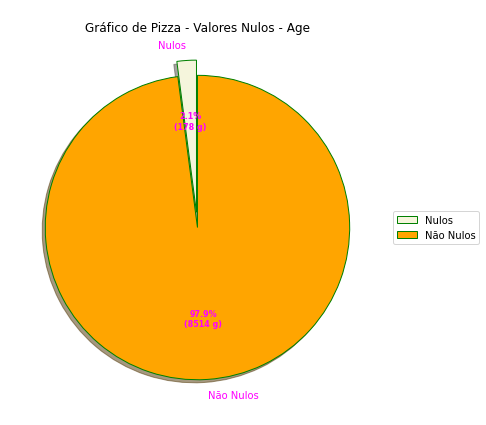

In [17]:
plotar_grafico_de_pizza_nulos(df, "Age")

Em idade existem 178 valores nulos.


Gráfico de Dispersão


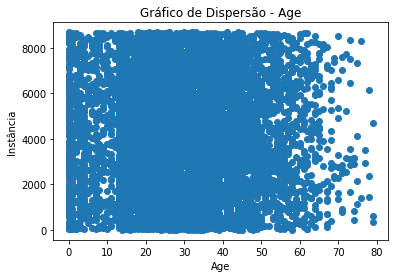

In [18]:
plotar_grafico_de_dispersao_atributo(df, "Age")

Em idade não existem valores aberrantes e inconsistentes.


Relação do atributo Age com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


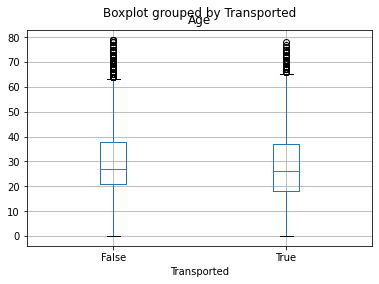

In [19]:
plotar_relacao_atributo_rotulo_bloxplot(df, "Age")


Relação do atributo Age com o Rótulo


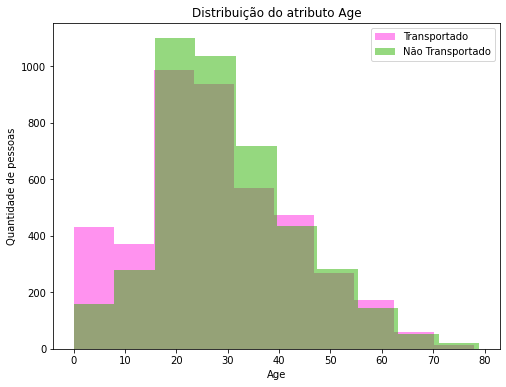

In [20]:
plotar_relacao_atributo_rotulo_barras(df, "Age")

Apesar dos dados estarem bem distribuídos pela idade em relação ao rótulo.
É possível perceber que:
  - A maioria das pessoas de 0 a 15 anos, de 40 a 45 anos, e de 55 a 70 anos, foram transportadas para outra dimensão.
  - A maioria das pessoas de 15 a 40 anos, de 45 a 55 anos, e de 70 a 80 anos, não foram transportadas para outra dimensão.

Analisar -> Gastos com Serviço de Quarto - RoomService

In [21]:
# Analisar Serviço de Quarto - RoomService
analise_estatistica_atributo(df, "RoomService")

Análise Estatística do atributo - RoomService
Valor médio: 224.69
Valor máximo: 14327.0
Valor mínimo: 0.0
Valor desvio padrão: 666.72
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 47.0


Histograma


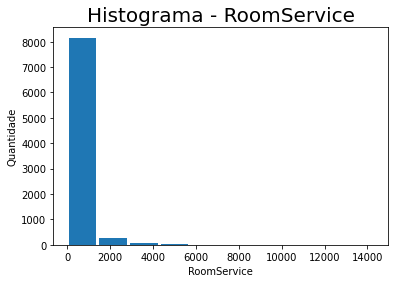

In [22]:
plotar_histograma_atributo(df, "RoomService")

Os gastos com serviço de quarto estão mais concentrados em valores menores que 2000.


Gráfico de Pizza - Valores Nulos - RoomService


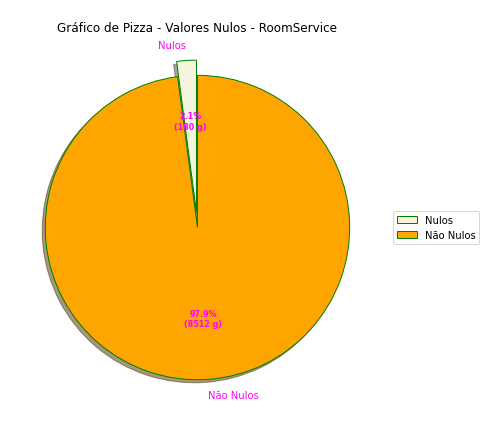

In [23]:
plotar_grafico_de_pizza_nulos(df, "RoomService")

Existem 180 valores nulos.


Gráfico de Dispersão


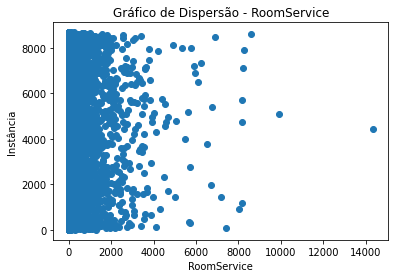

In [24]:
plotar_grafico_de_dispersao_atributo(df, "RoomService")

Valores Aberrantes -> acima de 8000

Não possui valores Inconsistentes !


Relação do atributo RoomService com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


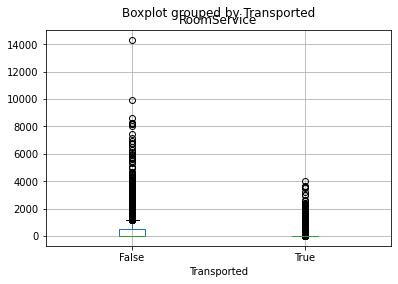

In [25]:
plotar_relacao_atributo_rotulo_bloxplot(df, "RoomService")


Relação do atributo RoomService com o Rótulo


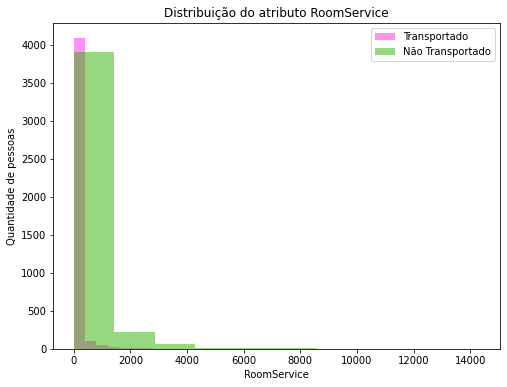

In [26]:
plotar_relacao_atributo_rotulo_barras(df, "RoomService")

É possível perceber que quem gastou mais com o serviço de quarto não foi transportado para outra dimensão.

Analisar Gastos com Praça de Alimentação - FoodCourt

In [27]:
analise_estatistica_atributo(df, "FoodCourt")

Análise Estatística do atributo - FoodCourt
Valor médio: 458.08
Valor máximo: 29813.0
Valor mínimo: 0.0
Valor desvio padrão: 1611.49
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 76.0


Histograma


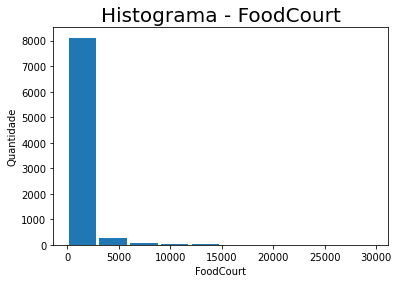

In [28]:
plotar_histograma_atributo(df, "FoodCourt")

Os gastos com alimentação estão mais concentrados em valores menores que 5000.


Gráfico de Pizza - Valores Nulos - FoodCourt


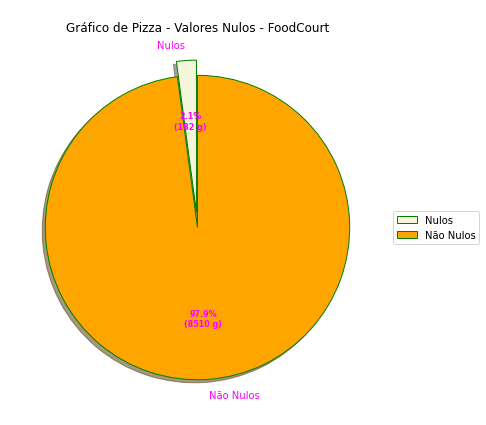

In [29]:
plotar_grafico_de_pizza_nulos(df, "FoodCourt")

Possui 182 valores nulos.


Gráfico de Dispersão


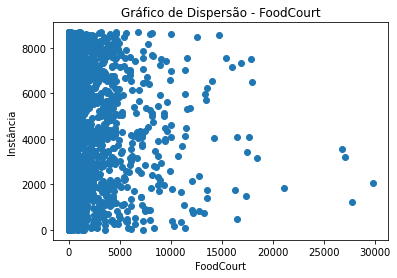

In [30]:
plotar_grafico_de_dispersao_atributo(df, "FoodCourt")

Valores aberrantes -> acima de 20000

Não possui valores Inconsistentes.


Relação do atributo FoodCourt com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


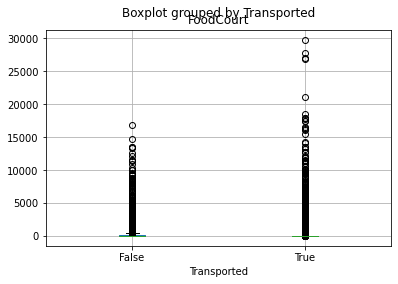

In [31]:
plotar_relacao_atributo_rotulo_bloxplot(df, "FoodCourt")


Relação do atributo FoodCourt com o Rótulo


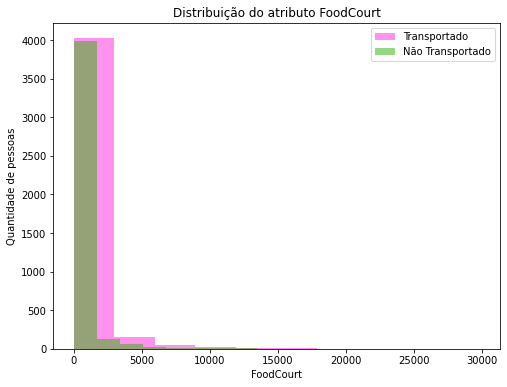

In [32]:
plotar_relacao_atributo_rotulo_barras(df, "FoodCourt")

É possível perceber que quanto mais se gastou com na praça de alimentação maior a chance da pessoa ser transportada para outra dimensão.

Analisar Gastos com Shopping - ShoppingMall

In [33]:
analise_estatistica_atributo(df, "ShoppingMall")

Análise Estatística do atributo - ShoppingMall
Valor médio: 173.73
Valor máximo: 23492.0
Valor mínimo: 0.0
Valor desvio padrão: 604.7
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 27.0


Histograma


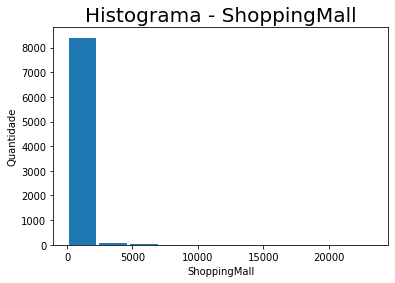

In [34]:
plotar_histograma_atributo(df, "ShoppingMall")

Percebe-se que os gastos com shopping são, em maioria, menores que 5000.


Gráfico de Pizza - Valores Nulos - ShoppingMall


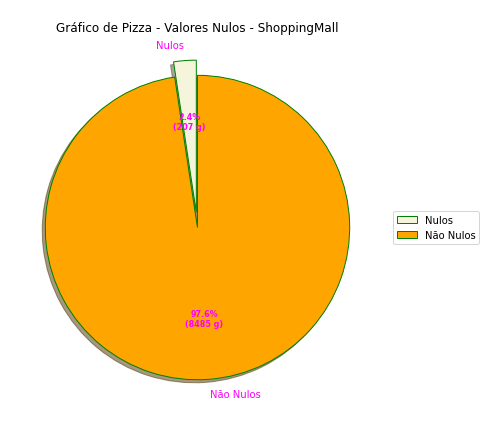

In [35]:
plotar_grafico_de_pizza_nulos(df, "ShoppingMall")

Possui 207 valores nulos.


Gráfico de Dispersão


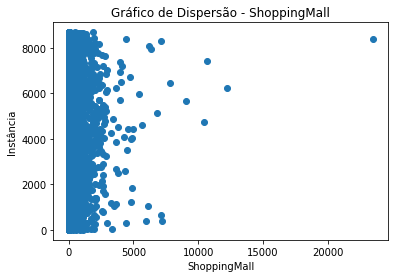

In [36]:
plotar_grafico_de_dispersao_atributo(df, "ShoppingMall")

Valores Aberrantes -> acima de 5000.

Não possui valores Inconsistentes.


Relação do atributo ShoppingMall com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


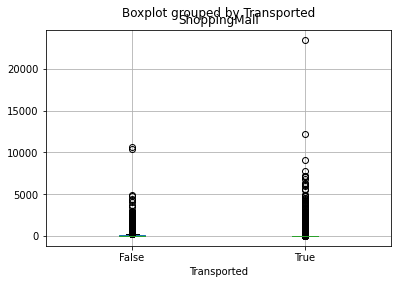

In [37]:
plotar_relacao_atributo_rotulo_bloxplot(df, "ShoppingMall")


Relação do atributo ShoppingMall com o Rótulo


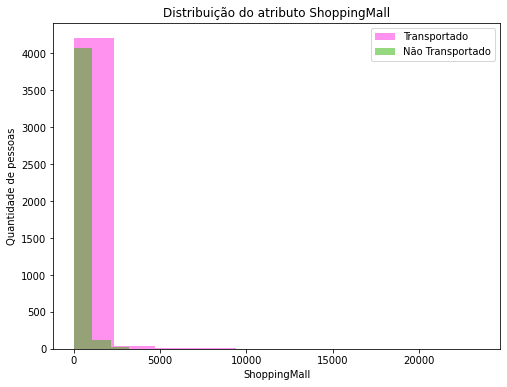

In [38]:
plotar_relacao_atributo_rotulo_barras(df, "ShoppingMall")

Percebe-se que quantos mais se gasta no shopping, maior a chance da pessoa ser transportada para outra dimensão.

Analisar Gastos com Spa - Spa

In [39]:
analise_estatistica_atributo(df, "Spa")

Análise Estatística do atributo - Spa
Valor médio: 311.14
Valor máximo: 22408.0
Valor mínimo: 0.0
Valor desvio padrão: 1136.71
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 59.0


Histograma


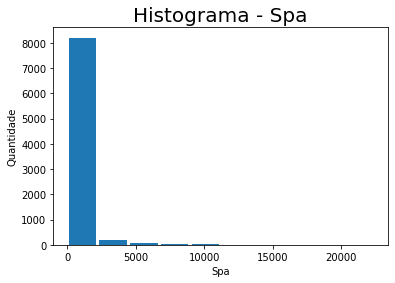

In [40]:
plotar_histograma_atributo(df, "Spa")

Os gastos com Spa estão mais concentrados em valores menores que 5000.


Gráfico de Pizza - Valores Nulos - Spa


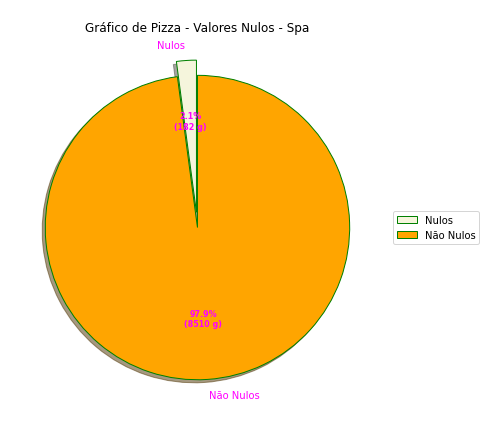

In [41]:
plotar_grafico_de_pizza_nulos(df, "Spa")

Possui 182 valores nulos.


Gráfico de Dispersão


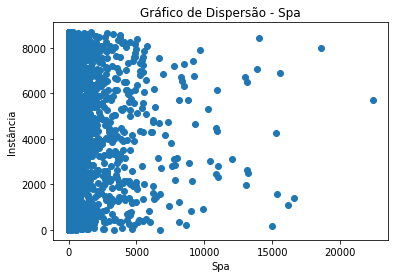

In [42]:
plotar_grafico_de_dispersao_atributo(df, "Spa")

Valores Aberrantes -> acima de 15000.

Não possui valores Inconsistentes.


Relação do atributo Spa com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


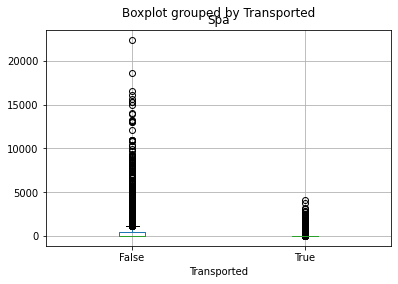

In [43]:
plotar_relacao_atributo_rotulo_bloxplot(df, "Spa")


Relação do atributo Spa com o Rótulo


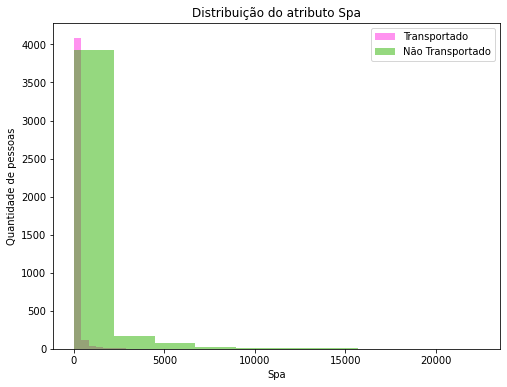

In [44]:
plotar_relacao_atributo_rotulo_barras(df, "Spa")

É possível perceber que quanto mais a pessoa gastou no Spa, menor a chance dela ser transportada para outra dimensão.

Analisar Gastos com VRDeck - VRDeck

In [45]:
analise_estatistica_atributo(df, "VRDeck")

Análise Estatística do atributo - VRDeck
Valor médio: 304.85
Valor máximo: 24133.0
Valor mínimo: 0.0
Valor desvio padrão: 1145.72
25% do valores contidos até: 0.0
50% do valores contidos até: 0.0
75% do valores contidos até: 46.0


Histograma


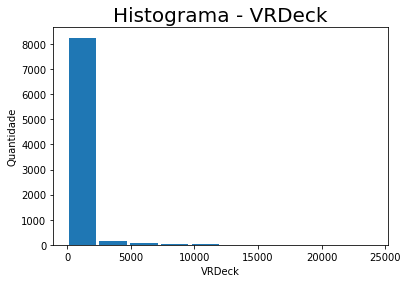

In [46]:
plotar_histograma_atributo(df, "VRDeck")

Os valores gastos com VRDeck estão mais concentrados em valores menores que 5000.


Gráfico de Pizza - Valores Nulos - VRDeck


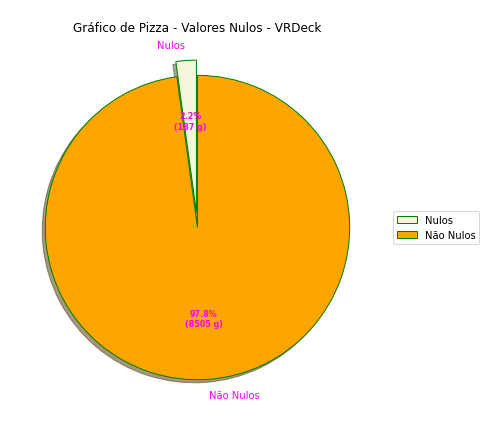

In [47]:
plotar_grafico_de_pizza_nulos(df, "VRDeck")

Possui 187 valores nulos.


Gráfico de Dispersão


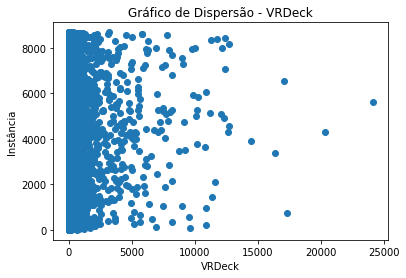

In [48]:
plotar_grafico_de_dispersao_atributo(df, "VRDeck")

Valores Aberrantes -> acima de 15000.

Não possui valores Inconsistentes.


Relação do atributo VRDeck com o Rótulo


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


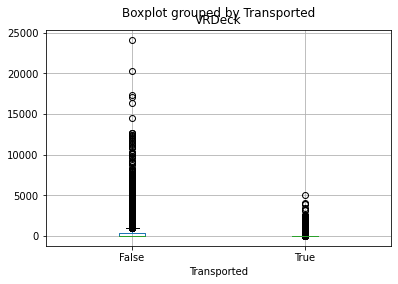

In [49]:
plotar_relacao_atributo_rotulo_bloxplot(df, "VRDeck")


Relação do atributo VRDeck com o Rótulo


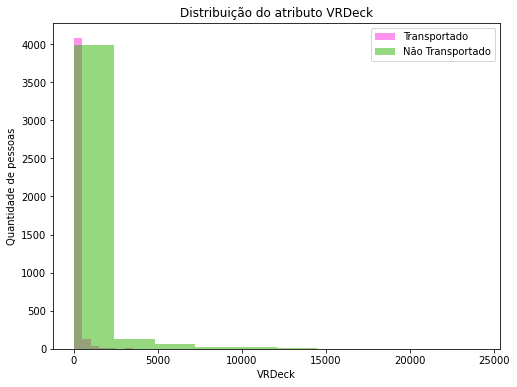

In [50]:
plotar_relacao_atributo_rotulo_barras(df, "VRDeck")

Percebe-se que quanto mais o passageiro gastou com VRDeck, menor a chance dele ser transportado para outra dimensão.

Conclui-se que:
  - Pessoas localizadas quartos mais caros, no spa e no vrdeck, tem uma chance menor de serem transportadas para outra dimensão
  - Pessoas localizadas na praça de alimentação e shopping, tem maiores chances de serem transportadas para outra dimensão.

#Análise dos Atributos Categóricos (binários, ordinais e nominais)

Analisar Id do Passageiro - PassengerId

In [51]:
unicidade(df, "PassengerId")

Unicidade - PassengerId
Quantidades únicas: 8693



Gráfico de Pizza - Valores Nulos - PassengerId


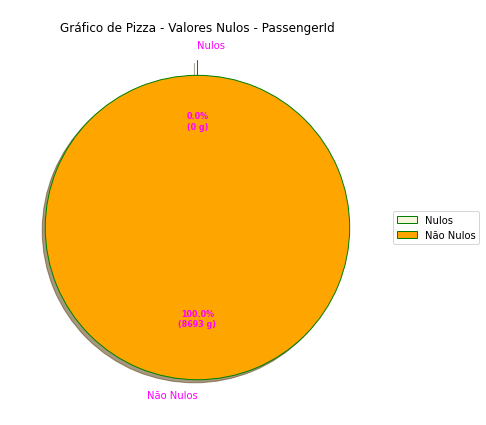

In [52]:
plotar_grafico_de_pizza_nulos(df, "PassengerId")

Não possui valores nulos.

Não possui valores Aberrantes.

Não possui valores Inconsistentes.

Analisar Planeta Natal - HomePlanet

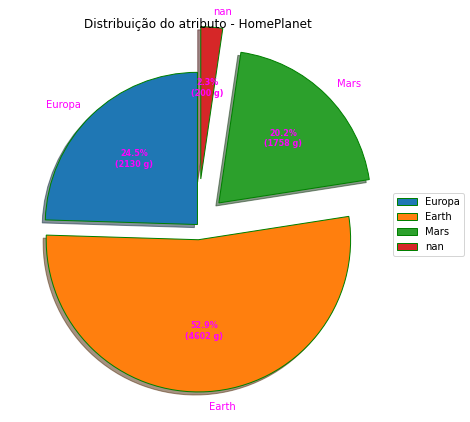

In [53]:
plotar_grafico_de_pizza_nominal(df, "HomePlanet")

Mais pessoas partiram da Terra.


Gráfico de Pizza - Valores Nulos - HomePlanet


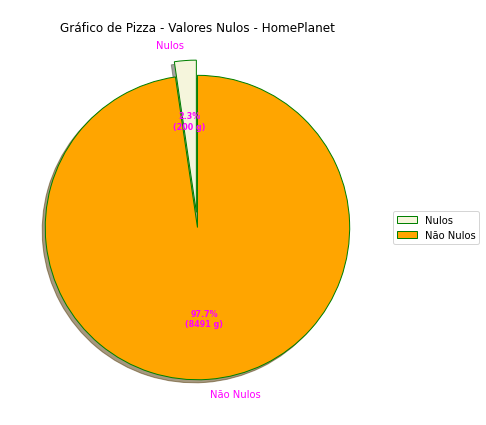

In [54]:
plotar_grafico_de_pizza_nulos(df, "HomePlanet")

Possui 200 valores nulos.

Não possui Valores Aberrantes.

Não possui Valores Inconsistentes.

Relação do atributo HomePlanet  com o Rótulo


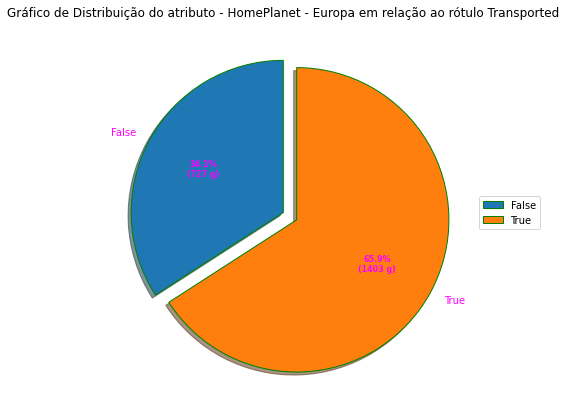

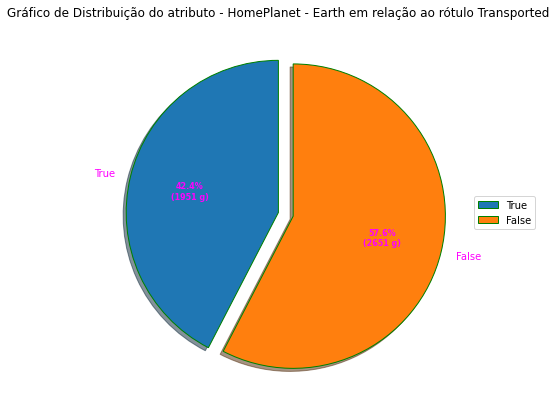

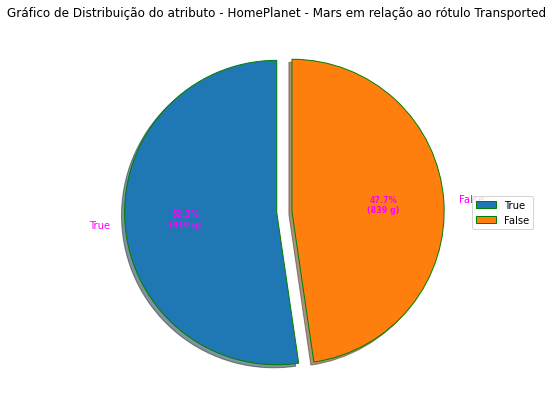

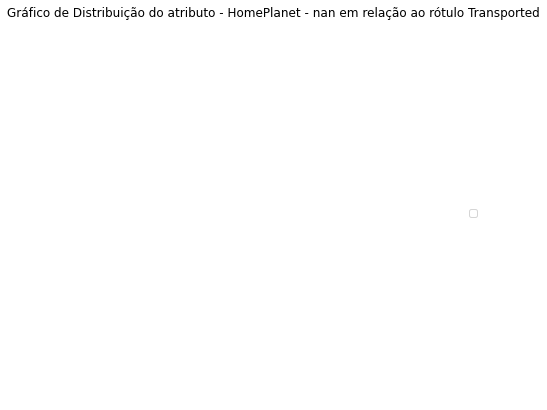

In [55]:
plotar_relacao_atributo_rotulo_pizza(df, "HomePlanet")

É possível perceber que pessoas que partiram do planeta:
 - Europa e Marte: tem mais chance de serem transportadas para outra dimensão.
 - Terra: tem menos chance de isso ocorrer.

Analisar Cabine de Sono - CryoSleep

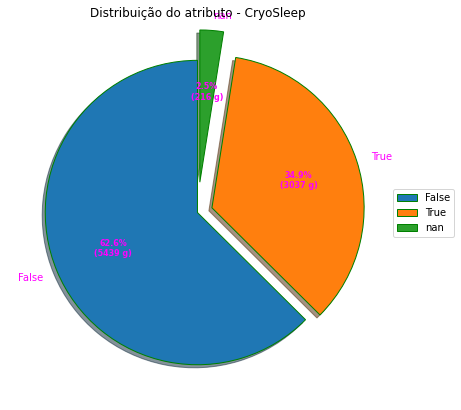

In [56]:
plotar_grafico_de_pizza_nominal(df, "CryoSleep")

Mais pessoas optaram por não entrar na cabine do sono.


Gráfico de Pizza - Valores Nulos - CryoSleep


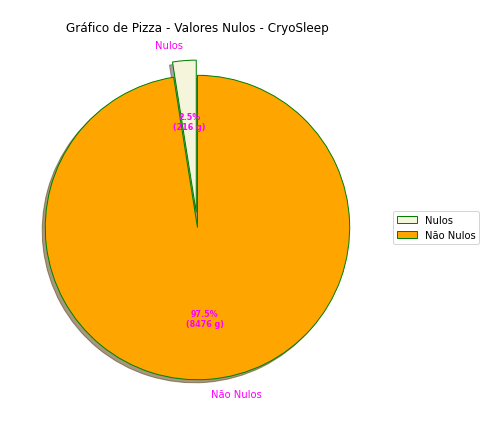

In [57]:
plotar_grafico_de_pizza_nulos(df, "CryoSleep")

Possui 216 valores nulos.

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !

Relação do atributo CryoSleep  com o Rótulo


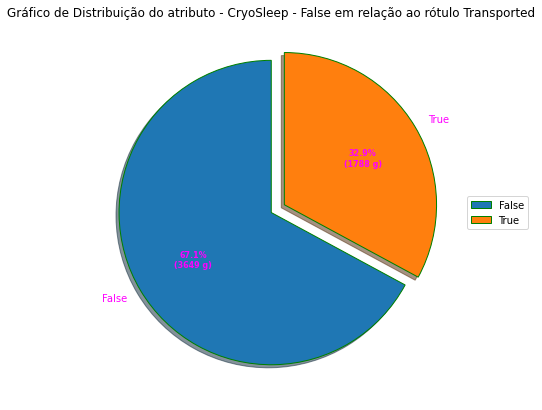

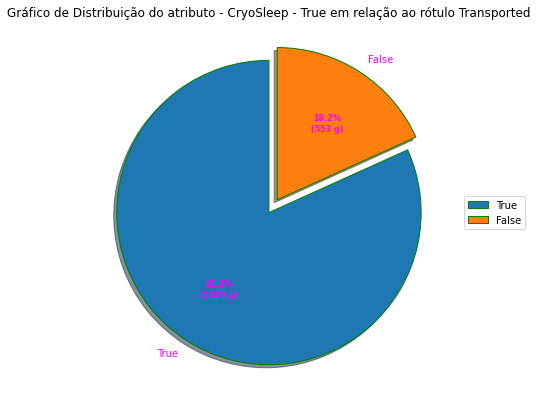

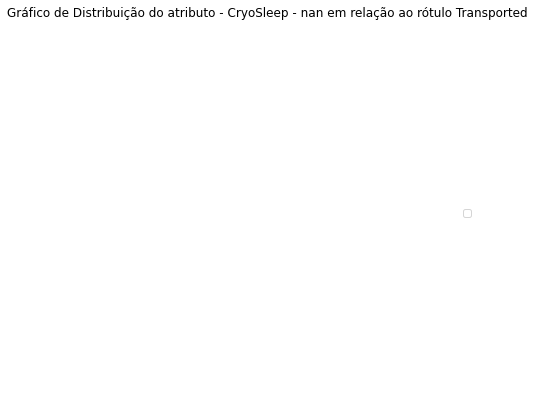

In [58]:
plotar_relacao_atributo_rotulo_pizza(df, "CryoSleep")

É possível perceber que:
 - Pessoas que foram para a Cabine do Sono tem mais chance de serem transportadas para outra dimensão, dos que as que não foram.

Analisar Cabine - Cabin

In [59]:
unicidade(df, "Cabin")


Unicidade - Cabin
Quantidades únicas: 6561



Gráfico de Pizza - Valores Nulos - Cabin


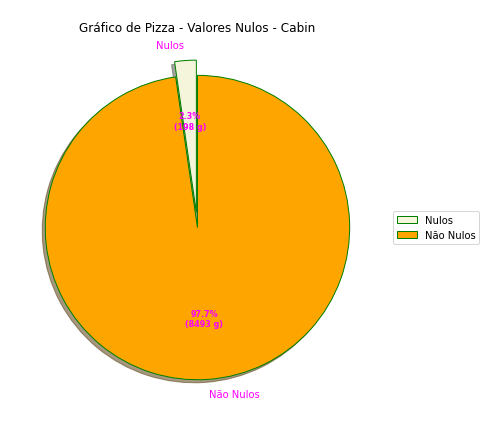

In [60]:
plotar_grafico_de_pizza_nulos(df, "Cabin")

Possui 198 valores nulos.

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !

In [61]:
#plotar_relacao_atributo_rotulo_pizza(df, "Cabin")

Analisar Destino - Destination

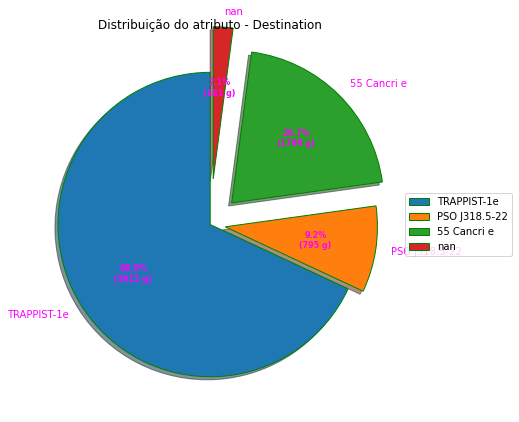

In [62]:
plotar_grafico_de_pizza_nominal(df, "Destination")

Percebe-se que mais pessoas estão se destinando ao planeta TRAPPIST-1e.


Gráfico de Pizza - Valores Nulos - Destination


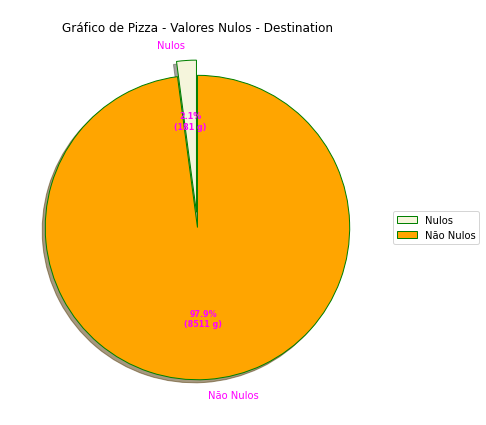

In [63]:
plotar_grafico_de_pizza_nulos(df, "Destination")

Possui 181 valores nulos.

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !

Relação do atributo Destination  com o Rótulo


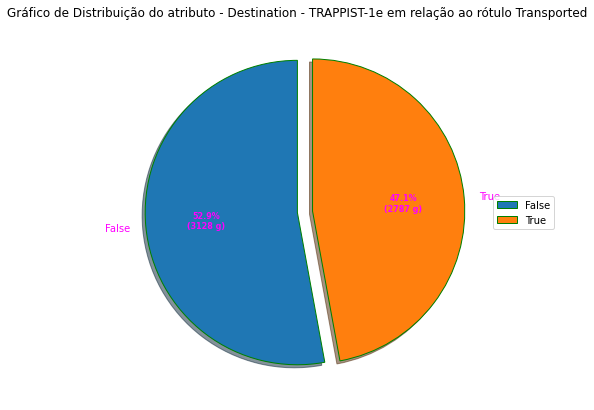

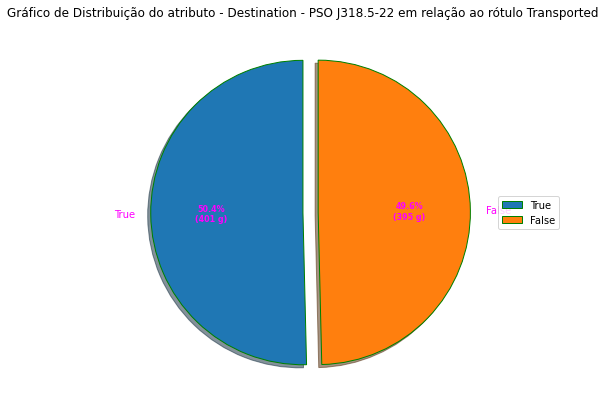

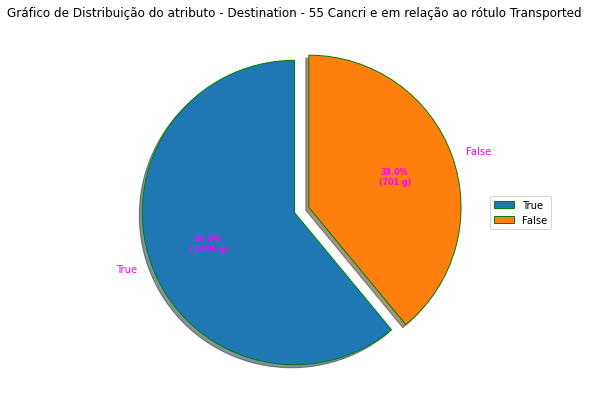

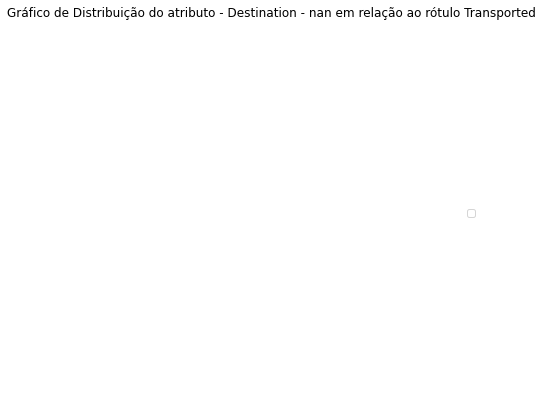

In [64]:
plotar_relacao_atributo_rotulo_pizza(df, "Destination")

É possível perceber que pessoas que estavam se destinando ao planeta:
 - TRAPPIST-1e: tem menos chance de serem transportadas para outra dimensão.
 - 55 Cancri e, PSO J318.5-22: tem mais chance de isso ocorrer.

Analisar Passageiro Vip - VIP

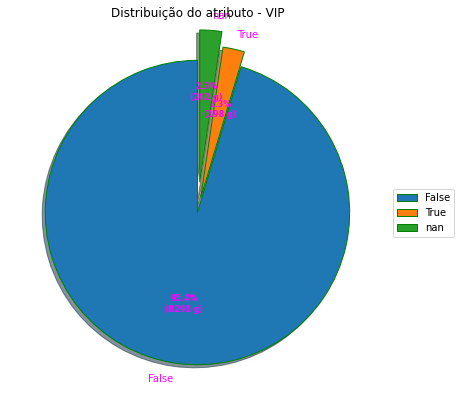

In [65]:
plotar_grafico_de_pizza_nominal(df, "VIP")

Percebe-se que apenas uma pequena parcela dos passageiros eram VIPs.


Gráfico de Pizza - Valores Nulos - VIP


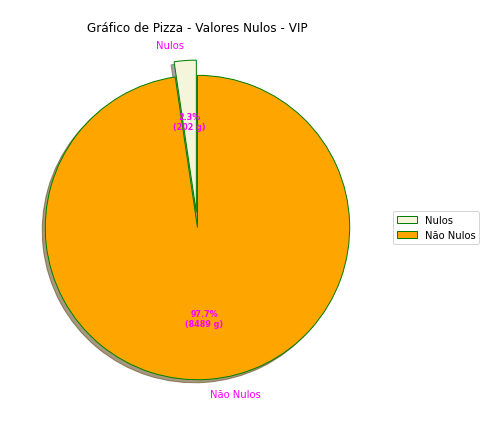

In [66]:
plotar_grafico_de_pizza_nulos(df, "VIP")

Possui 202 valores nulos.

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !

Relação do atributo VIP  com o Rótulo


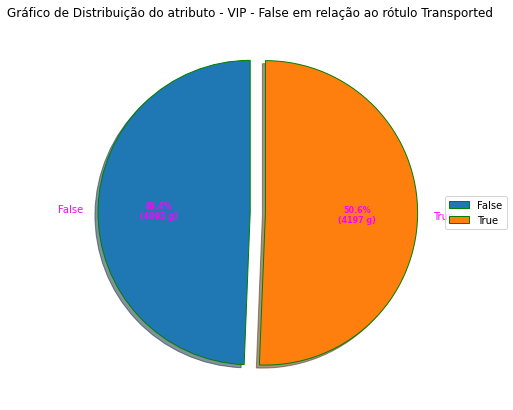

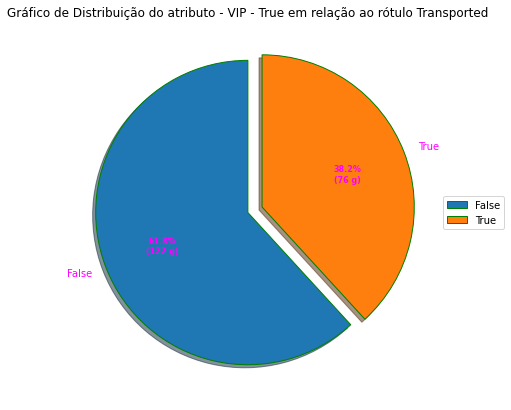

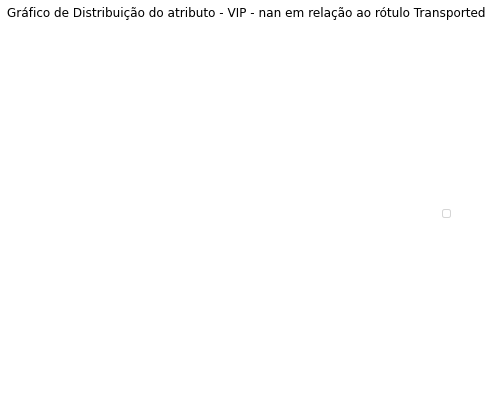

In [67]:
plotar_relacao_atributo_rotulo_pizza(df, "VIP")

Percebe-se que a maioria dos passageiros VIP's' não foram transportados para outra dimensão. No entanto, isso permanece bem distribuído entre os passageiros não VIP's'.

Analisar Nome do Passageiro - Name

In [68]:
unicidade(df, "Name")

Unicidade - Name
Quantidades únicas: 8474



Gráfico de Pizza - Valores Nulos - Name


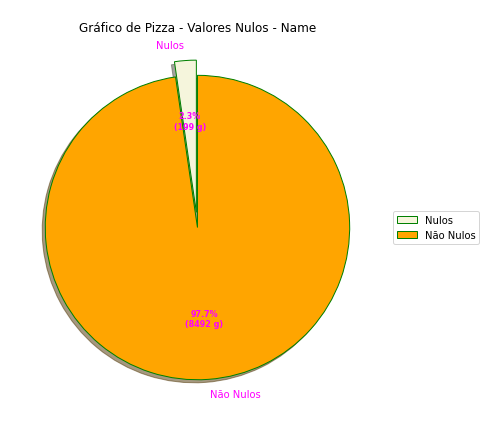

In [69]:
plotar_grafico_de_pizza_nulos(df, "Name")

Possui 199 valores nulos.

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !

In [70]:
# Possui Nomes Repetidos
print(Counter(df.Name))

Counter({nan: 200, 'Elaney Webstephrey': 2, 'Keitha Josey': 2, 'Ankalik Nateansive': 2, 'Gollux Reedall': 2, 'Grake Porki': 2, 'Gwendy Sykess': 2, 'Troya Schwardson': 2, 'Dia Cartez': 2, 'Sharie Gallenry': 2, 'Glenna Valezaley': 2, 'Apix Wala': 2, 'Sus Coolez': 2, 'Anton Woody': 2, 'Juane Popelazquez': 2, 'Loree Wolfernan': 2, 'Carry Contrevins': 2, 'Asch Stradick': 2, 'Cuses Pread': 2, 'Alraium Disivering': 2, 'Glena Hahnstonsen': 2, 'Maham Ofracculy': 1, 'Juanna Vines': 1, 'Altark Susent': 1, 'Solam Susent': 1, 'Willy Santantines': 1, 'Sandie Hinetthews': 1, 'Billex Jacostaffey': 1, 'Candra Jacostaffey': 1, 'Andona Beston': 1, 'Erraiam Flatic': 1, 'Altardr Flatic': 1, 'Wezena Flatic': 1, 'Berers Barne': 1, 'Reney Baketton': 1, 'Elle Bertsontry': 1, 'Justie Pooles': 1, 'Flats Eccle': 1, 'Carry Hughriend': 1, 'Alus Upead': 1, 'Lyde Brighttt': 1, 'Philda Brighttt': 1, 'Almary Brantuarez': 1, 'Glendy Brantuarez': 1, 'Mollen Mcfaddennon': 1, 'Breney Jacostanley': 1, 'Mael Brantuarez': 1, 

Analisar Transportado - Transported

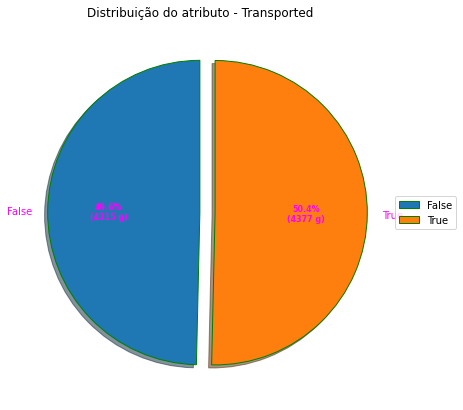

In [71]:
plotar_grafico_de_pizza_nominal(df, "Transported")

Percebe-se que está bem distribuído a quantidade de passageiros que foram transportados para outra dimensão e os que não foram.


Gráfico de Pizza - Valores Nulos - Transported


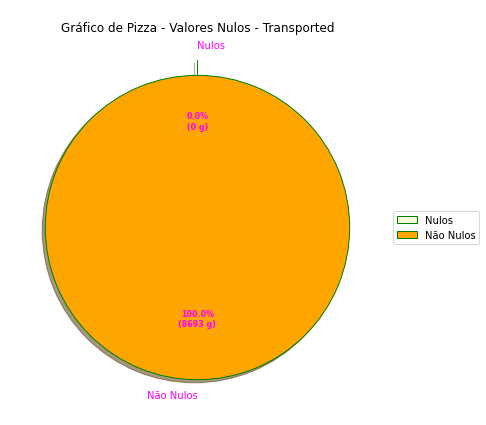

In [72]:
plotar_grafico_de_pizza_nulos(df, "Transported")

Não possui valores nulos.

Não possui Valores Aberrantes !

Não possui Valores Inconsistentes !

#Prévia Correlação entre os atributos

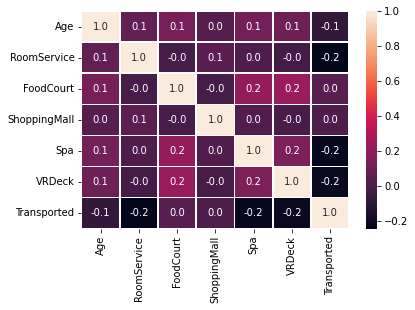

In [73]:
# análise de correlação

correlation = df.corr()

# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

A partir do Mapa de Calor de Correlação é possível perceber que os atributos  possuem baixíssima correlação.

Uma melhor análise da correlação dos atributos pode ser feita após uma discretização dos dados e a realização da transformação dos atributos nominais em númericos juntamente do One Hot Encoding.

Essa correlação vai melhorar principalmente quando o rótulo for transformado em inteiro.

#Limpeza e transformação de dados

# Preencher Dados Nulos

In [74]:
df.count()

PassengerId     8693
HomePlanet      8492
CryoSleep       8476
Cabin           8494
Destination     8511
Age             8514
VIP             8490
RoomService     8512
FoodCourt       8510
ShoppingMall    8485
Spa             8510
VRDeck          8505
Name            8493
Transported     8693
dtype: int64

In [75]:
# Preencher Dados Nulos com Média

atributos = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

imputers_continuos = dict()
# Usar media
for atributo in atributos: 
  imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
  imputer = imputer.fit(df[[atributo]])
  imputers_continuos[atributo] = imputer
  df[atributo] = imputers_continuos[atributo].transform(df[[atributo]])


In [76]:
# Usar Desconhecido

atributos = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]

imputers_nominais = SimpleImputer(strategy='constant', fill_value="Desconhecido", missing_values=np.nan)

for atributo in atributos: 
  imputers_nominais = imputers_nominais.fit(df[[atributo]])
  df[atributo] = imputers_nominais.transform(df[[atributo]])


In [77]:
df.count()

PassengerId     8693
HomePlanet      8693
CryoSleep       8693
Cabin           8693
Destination     8693
Age             8693
VIP             8693
RoomService     8693
FoodCourt       8693
ShoppingMall    8693
Spa             8693
VRDeck          8693
Name            8693
Transported     8693
dtype: int64

Para os atributos:
 - Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, foi utilizada a média para preencher os valores nulos.
 - HomePlanet, CryoSleep, Cabin, Destination, VIP, Name, foi utilizada a substituição pela constante "Desconhecido", para prencher os valores nulos.

#Suavizar Ruídos

Não será suavizado pois os dados parecem importantes no processo de classificação.

#Resolver Inconsistências

In [78]:
print("Não tem atributos inconsistentes !")
print("Tentar remover instâncias duplicadas !")

print("Itens Existentes",df.count()[0])

#Remover Duplicados
df.drop_duplicates(inplace=True)
print("Itens Existentes após remoção:",df.count()[0])


Não tem atributos inconsistentes !
Tentar remover instâncias duplicadas !
Itens Existentes 8693
Itens Existentes após remoção: 8693


Nessa Base de Dados não teve dados Duplicados.



In [79]:
# Utilizado pelo Apriori
df_frequentes = df.copy()

#Transformar atributos categóricos nominais e ordinais em um vetor numérico, usando o OneHotEncoder)

In [80]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [81]:
def aprender_labels(df, atributos):
  label_encoders = dict()
  
  for atributo in atributos:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[atributo])
    label_encoders[atributo] = label_encoder

  return label_encoders
  
# Transformar em numérico
def tranformar_em_numerico(df, label_encoders, atributos):
  for atributo in atributos:
    df[atributo] = label_encoders[atributo].transform(df[atributo])



In [82]:
atributos_nominais = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name", "Transported"]

for atributo in atributos_nominais:
  df[atributo] = df[atributo].astype(str)

label_encoders = aprender_labels(df, atributos_nominais)
tranformar_em_numerico(df, label_encoders, atributos_nominais)

df.head(10)

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01           2          1    149            3  39.0    1   
1     0002_01           1          1   2185            3  24.0    1   
2     0003_01           2          1      1            3  58.0    2   
3     0003_02           2          1      1            3  33.0    1   
4     0004_01           1          1   2187            3  16.0    1   
5     0005_01           1          1   2184            2  44.0    1   
6     0006_01           1          1   3426            3  26.0    1   
7     0006_02           1          2   4560            3  28.0    1   
8     0007_01           1          1   3566            3  35.0    1   
9     0008_01           2          2    150            0  14.0    1   

   RoomService  FoodCourt  ShoppingMall     Spa      VRDeck  Name  Transported  
0          0.0        0.0           0.0     0.0    0.000000  5253            0  
1        109.0        9.0          25.0   549.0   44.000000  4503            1  
2         43.0     3576.0           0.0  6715.0   49.000000   457            0  
3          0.0     1283.0         371.0  3329.0  193.000000  7150            0  
4        303.0       70.0         151.0   565.0    2.000000  8320            1  
5          0.0      483.0           0.0   291.0    0.000000  6879            1  
6         42.0     1539.0           3.0     0.0    0.000000  1155            1  
7          0.0        0.0           0.0     0.0  304.854791  1453            1  
8          0.0      785.0          17.0   216.0    0.000000   556            1  
9          0.0        0.0           0.0     0.0    0.000000  2865            1

In [83]:
def aprender_one_hot(df, atributos):
  hot_encoders = dict()
  
  for atributo in atributos:
    hot_encoder = preprocessing.OneHotEncoder()
    hot_encoder.fit(df[atributo].values.reshape(-1,1))
    hot_encoders[atributo] = hot_encoder

  return hot_encoders
  
# Transformar em numérico
def tranformar_onehot(df, hot_encoders, label_encoders, atributos):
  for atributo in atributos:
    X = hot_encoders[atributo].transform(df[atributo].values.reshape(-1,1)).toarray()
    #X[1]
    dfOneHot = pd.DataFrame(X, columns= [atributo + " " + label for label in label_encoders[atributo].classes_])
    df = pd.concat([df, dfOneHot], axis=1)
    df.drop([atributo], axis=1, inplace=True)
  return df

In [84]:

# Fazer one hot enconding
atributos_onehot = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
hot_encoders = aprender_one_hot(df, atributos_onehot)

# Fazer o One Hot Enconding
df = tranformar_onehot(df, hot_encoders, label_encoders, atributos_onehot)

df.head(10)

PassengerId  Cabin   Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0     0001_01    149  39.0          0.0        0.0           0.0     0.0   
1     0002_01   2185  24.0        109.0        9.0          25.0   549.0   
2     0003_01      1  58.0         43.0     3576.0           0.0  6715.0   
3     0003_02      1  33.0          0.0     1283.0         371.0  3329.0   
4     0004_01   2187  16.0        303.0       70.0         151.0   565.0   
5     0005_01   2184  44.0          0.0      483.0           0.0   291.0   
6     0006_01   3426  26.0         42.0     1539.0           3.0     0.0   
7     0006_02   4560  28.0          0.0        0.0           0.0     0.0   
8     0007_01   3566  35.0          0.0      785.0          17.0   216.0   
9     0008_01    150  14.0          0.0        0.0           0.0     0.0   

       VRDeck  Name  Transported  ...  CryoSleep Desconhecido  \
0    0.000000  5253            0  ...                     0.0   
1   44.000000  4503            1  ...                     0.0   
2   49.000000   457            0  ...                     0.0   
3  193.000000  7150            0  ...                     0.0   
4    2.000000  8320            1  ...                     0.0   
5    0.000000  6879            1  ...                     0.0   
6    0.000000  1155            1  ...                     0.0   
7  304.854791  1453            1  ...                     0.0   
8    0.000000   556            1  ...                     0.0   
9    0.000000  2865            1  ...                     0.0   

   CryoSleep False  CryoSleep True  Destination 55 Cancri e  \
0              1.0             0.0                      0.0   
1              1.0             0.0                      0.0   
2              1.0             0.0                      0.0   
3              1.0             0.0                      0.0   
4              1.0             0.0                      0.0   
5              1.0             0.0                      0.0   
6              1.0             0.0                      0.0   
7              0.0             1.0                      0.0   
8              1.0             0.0                      0.0   
9              0.0             1.0                      1.0   

   Destination Desconhecido  Destination PSO J318.5-22  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
5                       0.0                        1.0   
6                       0.0                        0.0   
7                       0.0                        0.0   
8                       0.0                        0.0   
9                       0.0                        0.0   

   Destination TRAPPIST-1e  VIP Desconhecido  VIP False  VIP True  
0                      1.0               0.0        1.0       0.0  
1                      1.0               0.0        1.0       0.0  
2                      1.0               0.0        0.0       1.0  
3                      1.0               0.0        1.0       0.0  
4                      1.0               0.0        1.0       0.0  
5                      0.0               0.0        1.0       0.0  
6                      1.0               0.0        1.0       0.0  
7                      1.0               0.0        1.0       0.0  
8                      1.0               0.0        1.0       0.0  
9                      0.0               0.0        1.0       0.0  

[10 rows x 24 columns]

In [85]:
print(df.columns)

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet Desconhecido', 'HomePlanet Earth', 'HomePlanet Europa',
       'HomePlanet Mars', 'CryoSleep Desconhecido', 'CryoSleep False',
       'CryoSleep True', 'Destination 55 Cancri e', 'Destination Desconhecido',
       'Destination PSO J318.5-22', 'Destination TRAPPIST-1e',
       'VIP Desconhecido', 'VIP False', 'VIP True'],
      dtype='object')


Após o One Hot Encoding, será feita uma análise da correlação.

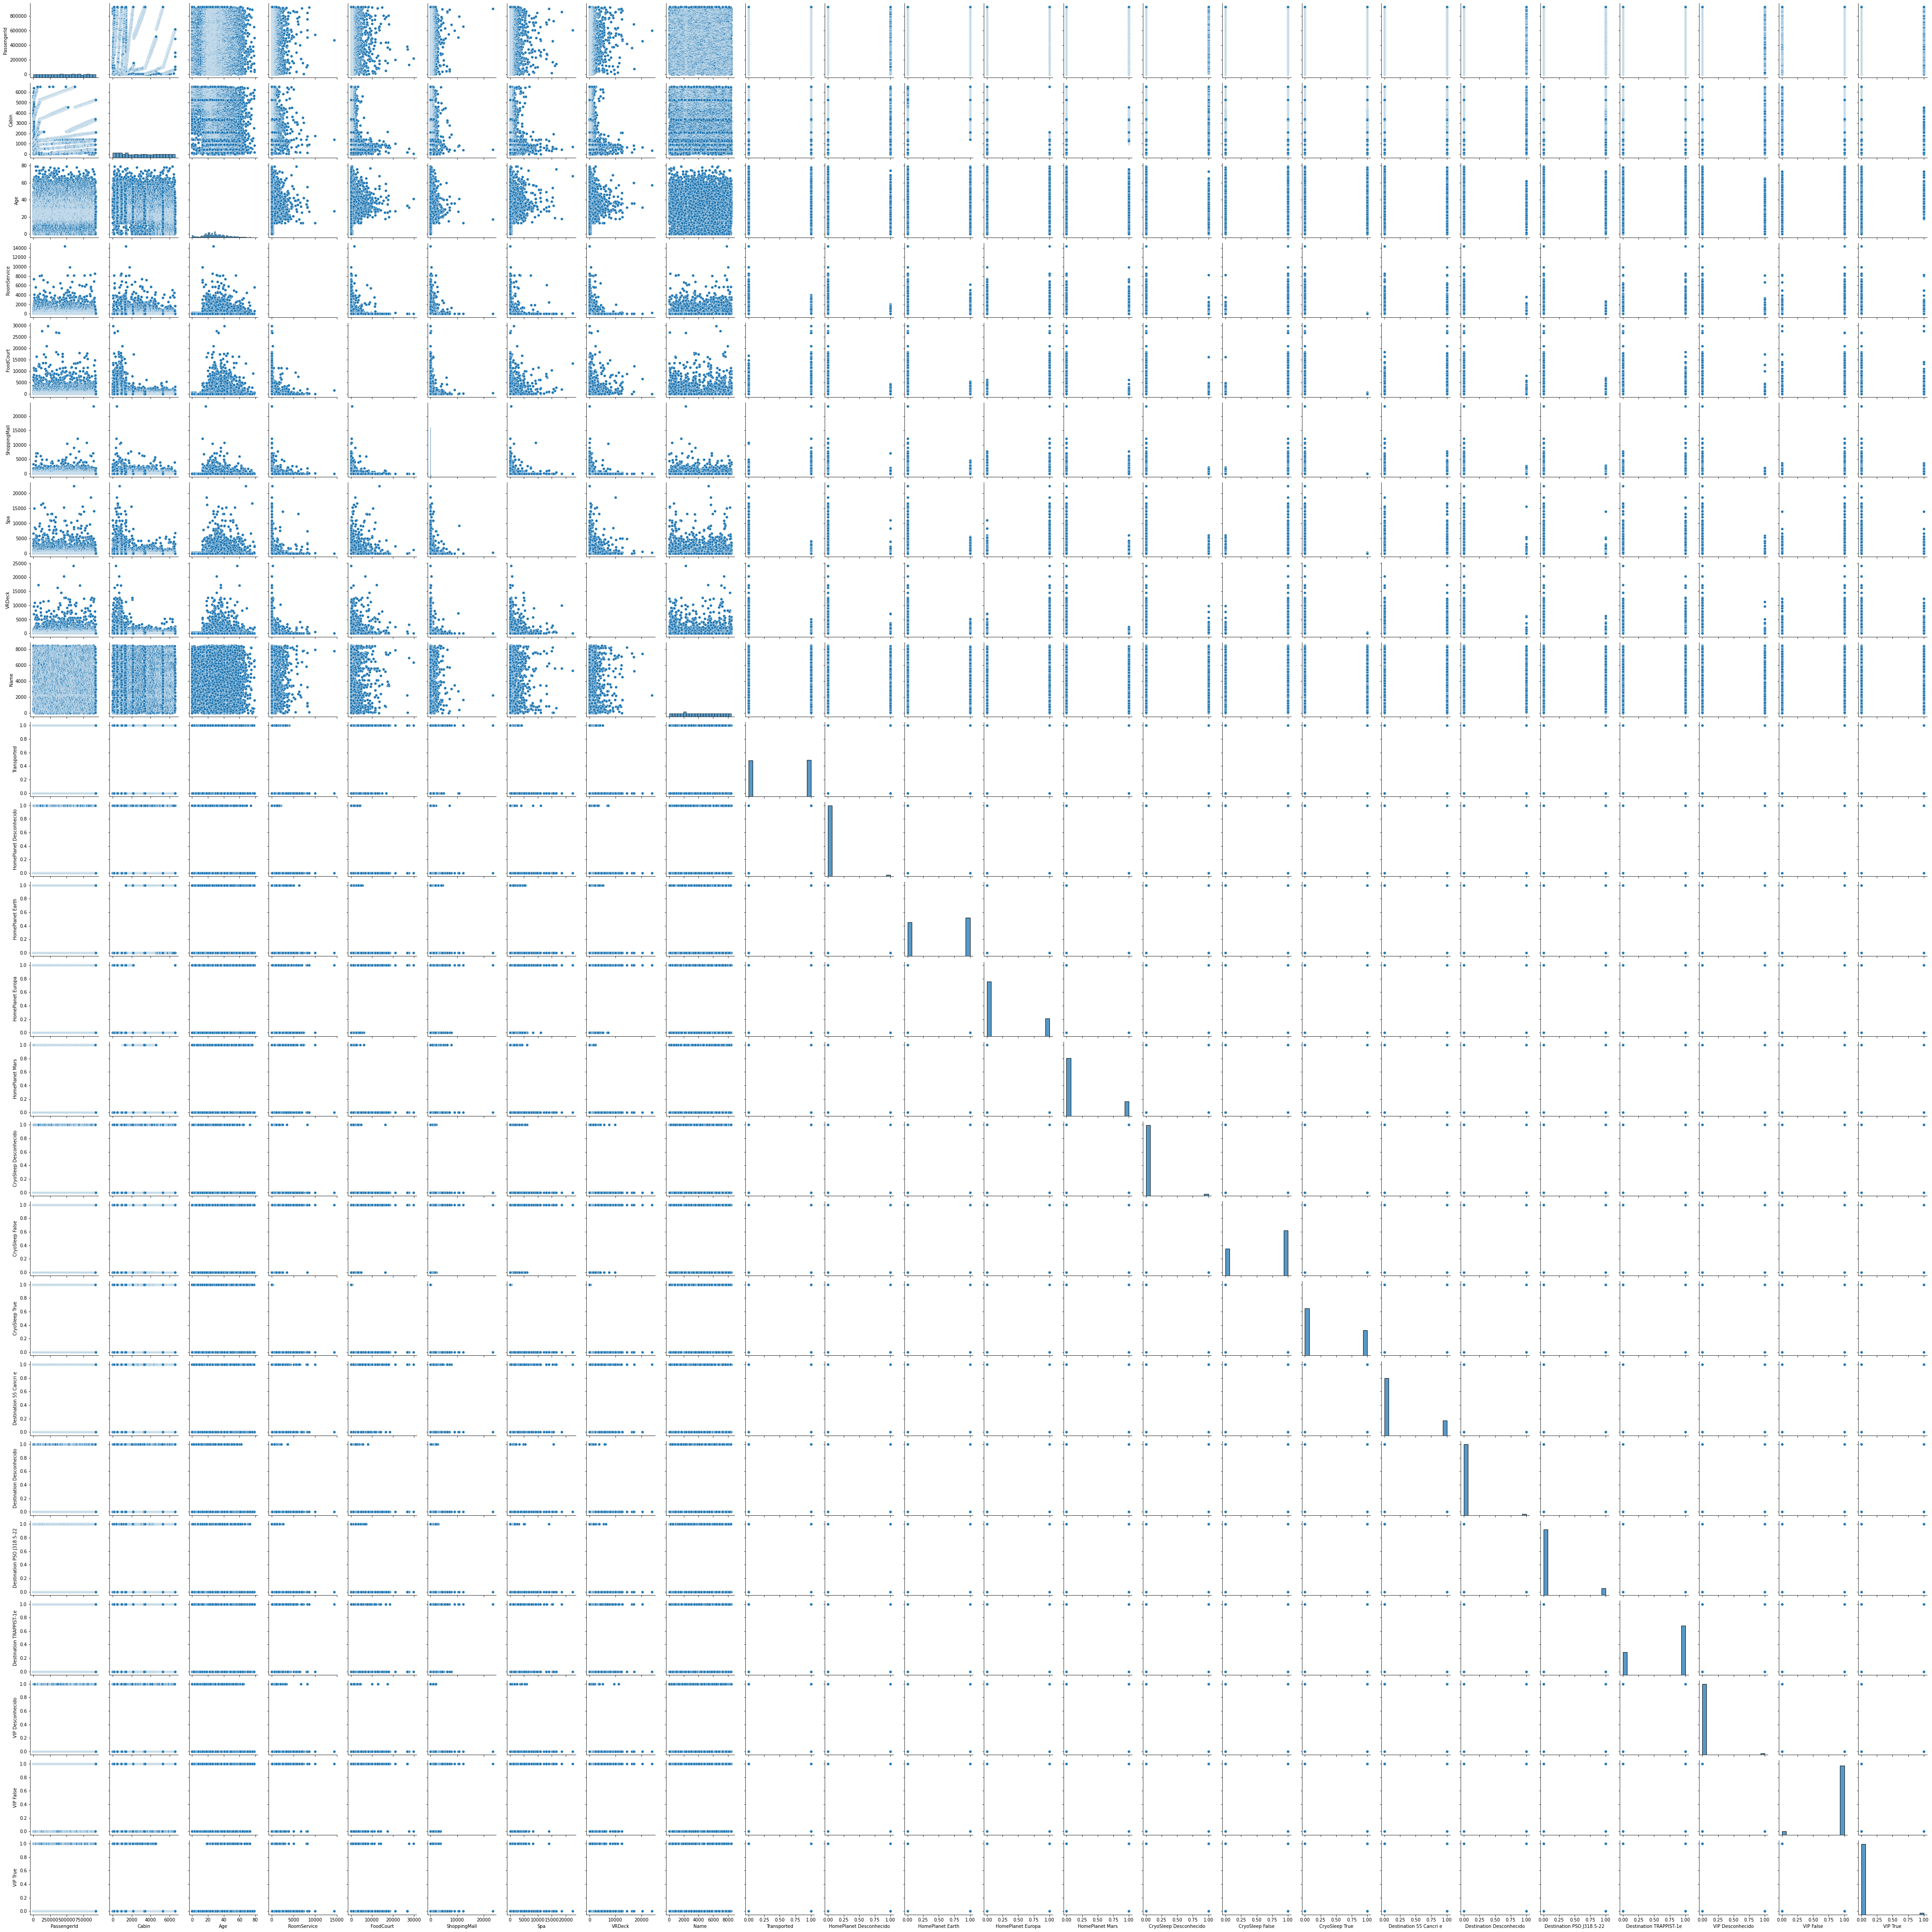

In [86]:
# Impressao da matriz de correlacao dos dados
for atributo in df.columns:
  df[atributo] = df[atributo].astype(float)
sns.pairplot(pd.DataFrame(dict(df)))

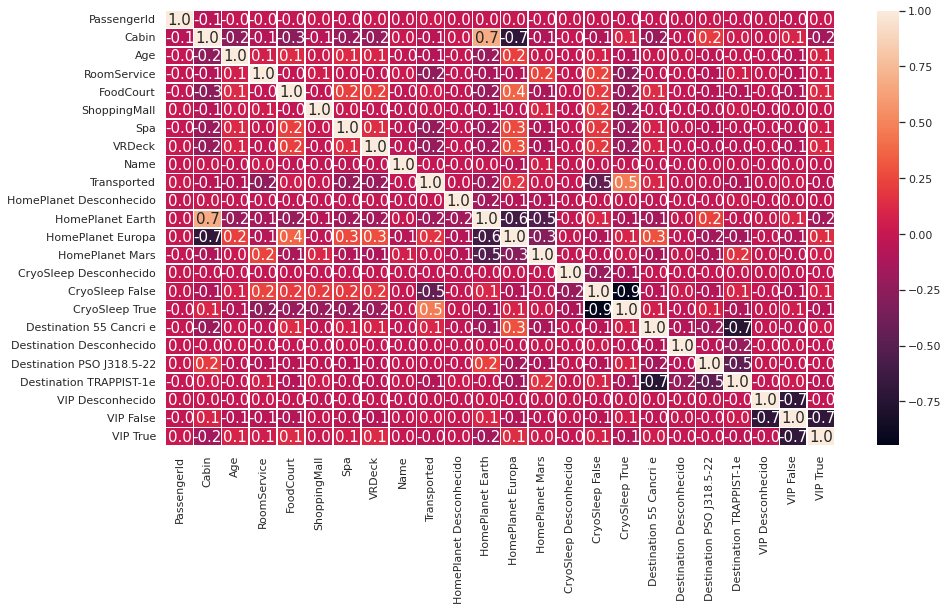

In [87]:
# análise de correlação

correlation = df.corr()

# plot da matriz de correlação
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, annot_kws = {'size':15})
plot

É possível observar que:
 - Existe uma correlação forte entre o Planeta de Partida e a Cabine.
 - Existem uma correlação moderada entre a Cabine de Hibernação e ser transportado para outra dimensão. Já analisado: se a pessoa foi para a Cabine de Hibernação, maior a chance de ser transportada para outra dimensão.
 -Existe uma correlação Moderada entre Planeta de Origem Europa e os gastos na praça de Alimentação (e em outras áreas da nave).

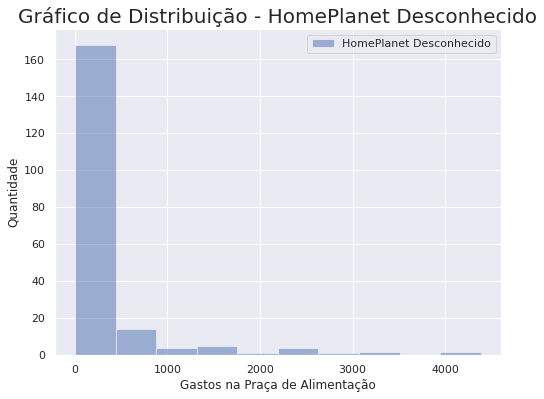

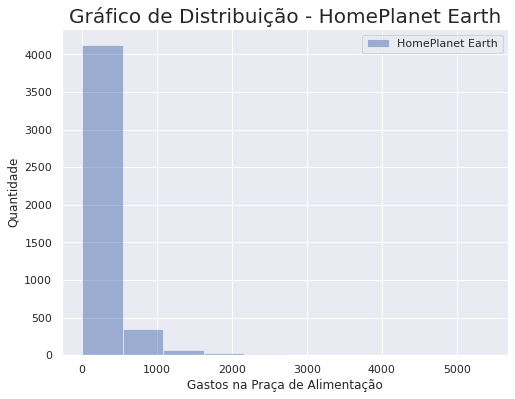

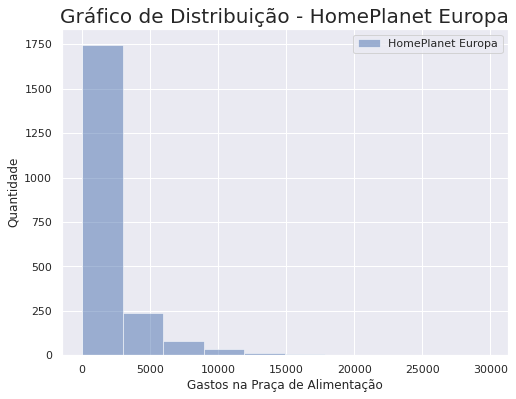

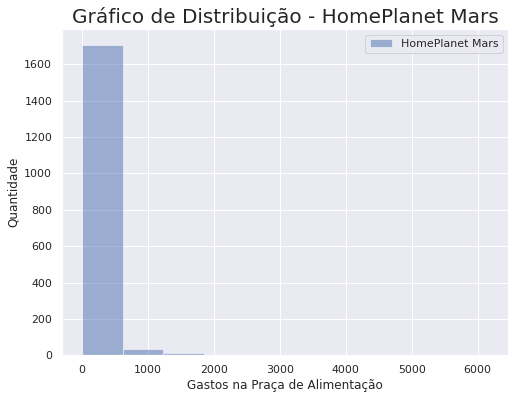

In [88]:
atributos = ['HomePlanet Desconhecido', 'HomePlanet Earth', 'HomePlanet Europa', 'HomePlanet Mars']

for atributo in atributos:
  sns.set()
  gasto = df[df[atributo] == 1]
  gasto = gasto.FoodCourt

  plt.figure(figsize=(8, 6))
  plt.title("Gráfico de Distribuição - "+ atributo, fontsize=20)
  plt.xlabel("Gastos na Praça de Alimentação")
  plt.ylabel('Quantidade')
  
  plt.hist(gasto, alpha=0.5, label=atributo)

  plt.legend(loc='upper right')
  print("\n")

# Normalizando os valores de atributos numéricos.

In [89]:
#Coloca Transported como ultimo atributo
def coloca_transported_ultimo(df):
  transported = list(df.Transported)

  df.drop("Transported", axis=1, inplace=True)
  df['Transported']= transported

In [90]:
def normalizador(df):
  scaler = preprocessing.MinMaxScaler()
  scaler.fit(df)
  return scaler

In [91]:
def normalizar(df, scaler):
  X = scaler.transform(df)
  df= pd.DataFrame(X, columns=df.columns)
  return df

In [92]:
# Min Max Scaler

coloca_transported_ultimo(df)
aux = df.copy()

df.drop(["Transported"], axis=1, inplace=True)

scaler = normalizador(df)

df = normalizar(df, scaler)
df["Transported"] = aux["Transported"]

df.head()

PassengerId     Cabin       Age  RoomService  FoodCourt  ShoppingMall  \
0     0.000000  0.022713  0.493671     0.000000   0.000000      0.000000   
1     0.000108  0.333079  0.303797     0.007608   0.000302      0.001064   
2     0.000216  0.000152  0.734177     0.003001   0.119948      0.000000   
3     0.000217  0.000152  0.417722     0.000000   0.043035      0.015793   
4     0.000323  0.333384  0.202532     0.021149   0.002348      0.006428   

        Spa    VRDeck      Name  HomePlanet Desconhecido  ...  \
0  0.000000  0.000000  0.619969                      0.0  ...   
1  0.024500  0.001823  0.531453                      0.0  ...   
2  0.299670  0.002030  0.053936                      0.0  ...   
3  0.148563  0.007997  0.843857                      0.0  ...   
4  0.025214  0.000083  0.981943                      0.0  ...   

   CryoSleep False  CryoSleep True  Destination 55 Cancri e  \
0              1.0             0.0                      0.0   
1              1.0             0.0                      0.0   
2              1.0             0.0                      0.0   
3              1.0             0.0                      0.0   
4              1.0             0.0                      0.0   

   Destination Desconhecido  Destination PSO J318.5-22  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Destination TRAPPIST-1e  VIP Desconhecido  VIP False  VIP True  Transported  
0                      1.0               0.0        1.0       0.0          0.0  
1                      1.0               0.0        1.0       0.0          1.0  
2                      1.0               0.0        0.0       1.0          0.0  
3                      1.0               0.0        1.0       0.0          0.0  
4                      1.0               0.0        1.0       0.0          1.0  

[5 rows x 24 columns]

Fazer uma verificação na correlação novamente.

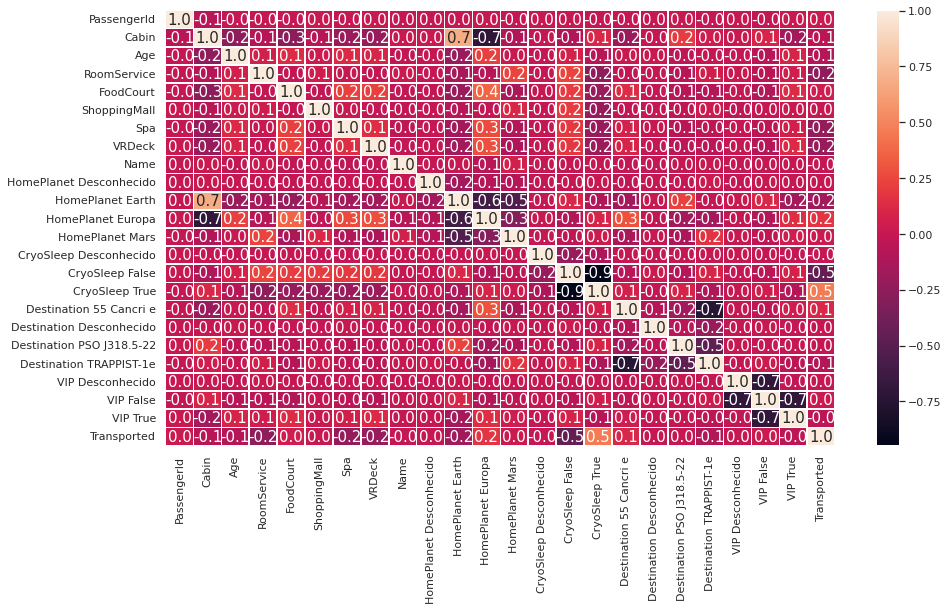

In [93]:
# análise de correlação
correlation = df.corr()

# plot da matriz de correlação
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, annot_kws = {'size':15})
plot

# Seleção de Atributos

In [94]:
#Remover PassengerId
df.drop(["PassengerId", "Name"], axis=1, inplace=True)
df.head()

Cabin       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0  0.022713  0.493671     0.000000   0.000000      0.000000  0.000000   
1  0.333079  0.303797     0.007608   0.000302      0.001064  0.024500   
2  0.000152  0.734177     0.003001   0.119948      0.000000  0.299670   
3  0.000152  0.417722     0.000000   0.043035      0.015793  0.148563   
4  0.333384  0.202532     0.021149   0.002348      0.006428  0.025214   

     VRDeck  HomePlanet Desconhecido  HomePlanet Earth  HomePlanet Europa  \
0  0.000000                      0.0               0.0                1.0   
1  0.001823                      0.0               1.0                0.0   
2  0.002030                      0.0               0.0                1.0   
3  0.007997                      0.0               0.0                1.0   
4  0.000083                      0.0               1.0                0.0   

   ...  CryoSleep False  CryoSleep True  Destination 55 Cancri e  \
0  ...              1.0             0.0                      0.0   
1  ...              1.0             0.0                      0.0   
2  ...              1.0             0.0                      0.0   
3  ...              1.0             0.0                      0.0   
4  ...              1.0             0.0                      0.0   

   Destination Desconhecido  Destination PSO J318.5-22  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Destination TRAPPIST-1e  VIP Desconhecido  VIP False  VIP True  Transported  
0                      1.0               0.0        1.0       0.0          0.0  
1                      1.0               0.0        1.0       0.0          1.0  
2                      1.0               0.0        0.0       1.0          0.0  
3                      1.0               0.0        1.0       0.0          0.0  
4                      1.0               0.0        1.0       0.0          1.0  

[5 rows x 22 columns]

# Discretização dos Atributos Numéricos

In [95]:
df_frequentes.drop(["PassengerId"], axis=1, inplace=True)
df_frequentes.head()

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False  
1        9.0          25.0   549.0    44.0       Juanna Vines         True  
2     3576.0           0.0  6715.0    49.0      Altark Susent        False  
3     1283.0         371.0  3329.0   193.0       Solam Susent        False  
4       70.0         151.0   565.0     2.0  Willy Santantines         True

In [96]:
print(df_frequentes.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')


Discretizar Idade

In [97]:
bins = [-1, 12, 18, 40, 60, df_frequentes.Age.max()+1]

df_frequentes["Age"] = pd.cut(df_frequentes["Age"].to_numpy(), 
                              bins=bins,
                              labels=["Criança", "Adolescente", "Adulto Jovem", "Adulto Velho", "Idoso"])

df_frequentes.head()

HomePlanet CryoSleep  Cabin  Destination           Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  Adulto Jovem  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  Adulto Jovem  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  Adulto Velho   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  Adulto Jovem  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e   Adolescente  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False  
1        9.0          25.0   549.0    44.0       Juanna Vines         True  
2     3576.0           0.0  6715.0    49.0      Altark Susent        False  
3     1283.0         371.0  3329.0   193.0       Solam Susent        False  
4       70.0         151.0   565.0     2.0  Willy Santantines         True

CryoSleep - Tornar mais Fácil de Entender

In [98]:
rotulos = {False: 'Não Hibernou', True: 'Hibernou', "Desconhecido" : "Não sabe se Hibernou"}
df_frequentes['CryoSleep'] = df_frequentes['CryoSleep'].map(rotulos)
df_frequentes.head()

HomePlanet     CryoSleep  Cabin  Destination           Age    VIP  \
0     Europa  Não Hibernou  B/0/P  TRAPPIST-1e  Adulto Jovem  False   
1      Earth  Não Hibernou  F/0/S  TRAPPIST-1e  Adulto Jovem  False   
2     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Velho   True   
3     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Jovem  False   
4      Earth  Não Hibernou  F/1/S  TRAPPIST-1e   Adolescente  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

VIP - Tornar mais Fácil de Entender

In [99]:
rotulos = {False: 'Não Vip', True: 'Vip', "Desconhecido": "Não sabe se é VIP"}
df_frequentes['VIP'] = df_frequentes['VIP'].map(rotulos)
df_frequentes.head()

HomePlanet     CryoSleep  Cabin  Destination           Age      VIP  \
0     Europa  Não Hibernou  B/0/P  TRAPPIST-1e  Adulto Jovem  Não Vip   
1      Earth  Não Hibernou  F/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
2     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Velho      Vip   
3     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
4      Earth  Não Hibernou  F/1/S  TRAPPIST-1e   Adolescente  Não Vip   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

Transported - Tornar mais Fácil de Entender

In [100]:
rotulos = {False: 'Não Transportado', True: 'Transportado'}
df_frequentes['Transported'] = df_frequentes['Transported'].map(rotulos)
df_frequentes.head()

HomePlanet     CryoSleep  Cabin  Destination           Age      VIP  \
0     Europa  Não Hibernou  B/0/P  TRAPPIST-1e  Adulto Jovem  Não Vip   
1      Earth  Não Hibernou  F/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
2     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Velho      Vip   
3     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
4      Earth  Não Hibernou  F/1/S  TRAPPIST-1e   Adolescente  Não Vip   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

        Transported  
0  Não Transportado  
1      Transportado  
2  Não Transportado  
3  Não Transportado  
4      Transportado

Discretizar Atributos - RoomService,	FoodCourt,	ShoppingMall,	Spa, VRDeck	

In [101]:
atributos = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for atributo in atributos:
  bins = [-1, 500, 1000, df_frequentes[atributo].max()+1]

  df_frequentes[atributo] = pd.cut(df_frequentes[atributo].to_numpy(), 
                                bins=bins,
                                labels=["Gasto Pouco " + atributo, 
                                        "Gasto Médio " + atributo,
                                        "Gasto Muito " + atributo])

df_frequentes.head()

HomePlanet     CryoSleep  Cabin  Destination           Age      VIP  \
0     Europa  Não Hibernou  B/0/P  TRAPPIST-1e  Adulto Jovem  Não Vip   
1      Earth  Não Hibernou  F/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
2     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Velho      Vip   
3     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
4      Earth  Não Hibernou  F/1/S  TRAPPIST-1e   Adolescente  Não Vip   

               RoomService              FoodCourt              ShoppingMall  \
0  Gasto Pouco RoomService  Gasto Pouco FoodCourt  Gasto Pouco ShoppingMall   
1  Gasto Pouco RoomService  Gasto Pouco FoodCourt  Gasto Pouco ShoppingMall   
2  Gasto Pouco RoomService  Gasto Muito FoodCourt  Gasto Pouco ShoppingMall   
3  Gasto Pouco RoomService  Gasto Muito FoodCourt  Gasto Pouco ShoppingMall   
4  Gasto Pouco RoomService  Gasto Pouco FoodCourt  Gasto Pouco ShoppingMall   

               Spa              VRDeck               Name       Transported  
0  Gasto Pouco Spa  Gasto Pouco VRDeck    Maham Ofracculy  Não Transportado  
1  Gasto Médio Spa  Gasto Pouco VRDeck       Juanna Vines      Transportado  
2  Gasto Muito Spa  Gasto Pouco VRDeck      Altark Susent  Não Transportado  
3  Gasto Muito Spa  Gasto Pouco VRDeck       Solam Susent  Não Transportado  
4  Gasto Médio Spa  Gasto Pouco VRDeck  Willy Santantines      Transportado

In [102]:
df_frequentes.count()

HomePlanet      8693
CryoSleep       8693
Cabin           8693
Destination     8693
Age             8693
VIP             8693
RoomService     8693
FoodCourt       8693
ShoppingMall    8693
Spa             8693
VRDeck          8693
Name            8693
Transported     8693
dtype: int64

# Encontrar Regras de Transações

Remover Espaços Antes de Depois dos atributos

In [103]:
for atributo in df_frequentes.columns:
  df_frequentes[atributo] = df_frequentes[atributo].str.strip()

df_frequentes.head()

HomePlanet     CryoSleep  Cabin  Destination           Age      VIP  \
0     Europa  Não Hibernou  B/0/P  TRAPPIST-1e  Adulto Jovem  Não Vip   
1      Earth  Não Hibernou  F/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
2     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Velho      Vip   
3     Europa  Não Hibernou  A/0/S  TRAPPIST-1e  Adulto Jovem  Não Vip   
4      Earth  Não Hibernou  F/1/S  TRAPPIST-1e   Adolescente  Não Vip   

               RoomService              FoodCourt              ShoppingMall  \
0  Gasto Pouco RoomService  Gasto Pouco FoodCourt  Gasto Pouco ShoppingMall   
1  Gasto Pouco RoomService  Gasto Pouco FoodCourt  Gasto Pouco ShoppingMall   
2  Gasto Pouco RoomService  Gasto Muito FoodCourt  Gasto Pouco ShoppingMall   
3  Gasto Pouco RoomService  Gasto Muito FoodCourt  Gasto Pouco ShoppingMall   
4  Gasto Pouco RoomService  Gasto Pouco FoodCourt  Gasto Pouco ShoppingMall   

               Spa              VRDeck               Name       Transported  
0  Gasto Pouco Spa  Gasto Pouco VRDeck    Maham Ofracculy  Não Transportado  
1  Gasto Médio Spa  Gasto Pouco VRDeck       Juanna Vines      Transportado  
2  Gasto Muito Spa  Gasto Pouco VRDeck      Altark Susent  Não Transportado  
3  Gasto Muito Spa  Gasto Pouco VRDeck       Solam Susent  Não Transportado  
4  Gasto Médio Spa  Gasto Pouco VRDeck  Willy Santantines      Transportado

Transformar cada instância da base para o formato transacional

In [104]:
transactions = []
for i in range(0, len(df_frequentes)):
    transactions.append([str(df_frequentes.values[i,j]) for j in range(0, len(df_frequentes.columns))])

transactions[0]

['Europa',
 'Não Hibernou',
 'B/0/P',
 'TRAPPIST-1e',
 'Adulto Jovem',
 'Não Vip',
 'Gasto Pouco RoomService',
 'Gasto Pouco FoodCourt',
 'Gasto Pouco ShoppingMall',
 'Gasto Pouco Spa',
 'Gasto Pouco VRDeck',
 'Maham Ofracculy',
 'Não Transportado']

Codificar o One Hot para utilizar o apriori

In [105]:
# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

55 Cancri e  A/0/P  A/0/S  A/1/S  A/10/P  A/10/S  A/100/S  A/101/S  \
0        False  False  False  False   False   False    False    False   
1        False  False  False  False   False   False    False    False   
2        False  False   True  False   False   False    False    False   
3        False  False   True  False   False   False    False    False   
4        False  False  False  False   False   False    False    False   

   A/102/S  A/103/S  ...  Zinopus Spandisket  Zinor Axlentindy  \
0    False    False  ...               False             False   
1    False    False  ...               False             False   
2    False    False  ...               False             False   
3    False    False  ...               False             False   
4    False    False  ...               False             False   

   Zinor Proorbeng  Zinoth Lansuffle  Zosmark Trattle  Zosmark Unaasor  \
0            False             False            False            False   
1            False             False            False            False   
2            False             False            False            False   
3            False             False            False            False   
4            False             False            False            False   

   Zosmas Ineedeve  Zosmas Mormonized  Zubeneb Flesping  Zubeneb Pasharne  
0            False              False             False             False  
1            False              False             False             False  
2            False              False             False             False  
3            False              False             False             False  
4            False              False             False             False  

[5 rows x 15068 columns]

Gerar Itens Frequentes e Regras de Associação

In [106]:
# Gerar Itens Frequentes
frequent_itemsets = apriori(onehot, min_support=0.07, use_colnames=True)

# Gerar Regras a Partir dos Items frequentes
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(1000)

antecedents                     consequents  \
0                          (Europa)                   (55 Cancri e)   
1                     (55 Cancri e)                        (Europa)   
2                     (55 Cancri e)       (Gasto Pouco RoomService)   
3         (Gasto Pouco RoomService)                   (55 Cancri e)   
4                     (55 Cancri e)      (Gasto Pouco ShoppingMall)   
..                              ...                             ...   
995               (Gasto Pouco Spa)          (Earth, PSO J318.5-22)   
996            (Earth, TRAPPIST-1e)               (Gasto Pouco Spa)   
997  (TRAPPIST-1e, Gasto Pouco Spa)                         (Earth)   
998                         (Earth)  (TRAPPIST-1e, Gasto Pouco Spa)   
999               (Gasto Pouco Spa)            (Earth, TRAPPIST-1e)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.245140            0.207063  0.101921    0.415767  2.007925   
1              0.207063            0.245140  0.101921    0.492222  2.007925   
2              0.207063            0.860002  0.186127    0.898889  1.045217   
3              0.860002            0.207063  0.186127    0.216426  1.045217   
4              0.207063            0.885310  0.187737    0.906667  1.024123   
..                  ...                 ...       ...         ...       ...   
995            0.863223            0.081905  0.075923    0.087953  1.073843   
996            0.356724            0.863223  0.312320    0.875524  1.014250   
997            0.586334            0.529391  0.312320    0.532666  1.006186   
998            0.529391            0.586334  0.312320    0.589961  1.006186   
999            0.863223            0.356724  0.312320    0.361807  1.014250   

     leverage  conviction  
0    0.051162    1.357228  
1    0.051162    1.486596  
2    0.008052    1.384593  
3    0.008052    1.011949  
4    0.004422    1.228821  
..        ...         ...  
995  0.005221    1.006631  
996  0.004388    1.098820  
997  0.001920    1.007007  
998  0.001920    1.008846  
999  0.004388    1.007965  

[1000 rows x 9 columns]

Encontrar Regras Interessantes

In [107]:
rules[ (rules['confidence'] >= 0.90) & (rules['support'] >= 0.75)  ]

antecedents consequents  antecedent support  \
100     (Gasto Pouco FoodCourt)   (Não Vip)            0.839066   
112   (Gasto Pouco RoomService)   (Não Vip)            0.860002   
120  (Gasto Pouco ShoppingMall)   (Não Vip)            0.885310   
132           (Gasto Pouco Spa)   (Não Vip)            0.863223   
142        (Gasto Pouco VRDeck)   (Não Vip)            0.866904   

     consequent support   support  confidence      lift  leverage  conviction  
100            0.953756  0.805476    0.959967  1.006512  0.005212    1.155152  
112            0.953756  0.823536    0.957598  1.004028  0.003304    1.090602  
120            0.953756  0.844473    0.953872  1.000122  0.000103    1.002520  
132            0.953756  0.826872    0.957889  1.004334  0.003568    1.098151  
142            0.953756  0.831359    0.958997  1.005495  0.004543    1.127817

Com mais de 90% de confiança e 75% de suporte:

  - Se uma pessoa gastou pouco em qualquer área então ela não é VIP

In [108]:
rules[ (rules['confidence'] >= 0.95) & (rules['support'] >= 0.6)]

antecedents consequents  \
100                             (Gasto Pouco FoodCourt)   (Não Vip)   
112                           (Gasto Pouco RoomService)   (Não Vip)   
120                          (Gasto Pouco ShoppingMall)   (Não Vip)   
132                                   (Gasto Pouco Spa)   (Não Vip)   
142                                (Gasto Pouco VRDeck)   (Não Vip)   
166                                       (TRAPPIST-1e)   (Não Vip)   
1264   (Gasto Pouco FoodCourt, Gasto Pouco RoomService)   (Não Vip)   
1296  (Gasto Pouco FoodCourt, Gasto Pouco ShoppingMall)   (Não Vip)   
1330           (Gasto Pouco FoodCourt, Gasto Pouco Spa)   (Não Vip)   
1366        (Gasto Pouco FoodCourt, Gasto Pouco VRDeck)   (Não Vip)   
1476  (Gasto Pouco RoomService, Gasto Pouco Shopping...   (Não Vip)   
1506         (Gasto Pouco Spa, Gasto Pouco RoomService)   (Não Vip)   
1528      (Gasto Pouco VRDeck, Gasto Pouco RoomService)   (Não Vip)   
1612        (Gasto Pouco Spa, Gasto Pouco ShoppingMall)   (Não Vip)   
1636     (Gasto Pouco VRDeck, Gasto Pouco ShoppingMall)   (Não Vip)   
1714              (Gasto Pouco Spa, Gasto Pouco VRDeck)   (Não Vip)   
7206  (Gasto Pouco FoodCourt, Gasto Pouco RoomServic...   (Não Vip)   
7272  (Gasto Pouco FoodCourt, Gasto Pouco Spa, Gasto...   (Não Vip)   
7336  (Gasto Pouco FoodCourt, Gasto Pouco VRDeck, Ga...   (Não Vip)   
7560  (Gasto Pouco FoodCourt, Gasto Pouco Spa, Gasto...   (Não Vip)   
7634  (Gasto Pouco FoodCourt, Gasto Pouco VRDeck, Ga...   (Não Vip)   
7854  (Gasto Pouco FoodCourt, Gasto Pouco Spa, Gasto...   (Não Vip)   
8542  (Gasto Pouco RoomService, Gasto Pouco Spa, Gas...   (Não Vip)   
8592  (Gasto Pouco VRDeck, Gasto Pouco RoomService, ...   (Não Vip)   
8776  (Gasto Pouco VRDeck, Gasto Pouco Spa, Gasto Po...   (Não Vip)   
9276  (Gasto Pouco VRDeck, Gasto Pouco Spa, Gasto Po...   (Não Vip)   

      antecedent support  consequent support   support  confidence      lift  \
100             0.839066            0.953756  0.805476    0.959967  1.006512   
112             0.860002            0.953756  0.823536    0.957598  1.004028   
120             0.885310            0.953756  0.844473    0.953872  1.000122   
132             0.863223            0.953756  0.826872    0.957889  1.004334   
142             0.866904            0.953756  0.831359    0.958997  1.005495   
166             0.680433            0.953756  0.651904    0.958073  1.004526   
1264            0.712757            0.953756  0.687335    0.964332  1.011089   
1296            0.736915            0.953756  0.707581    0.960194  1.006750   
1330            0.747038            0.953756  0.718164    0.961349  1.007961   
1366            0.754055            0.953756  0.725181    0.961709  1.008338   
1476            0.764753            0.953756  0.732313    0.957581  1.004011   
1506            0.735764            0.953756  0.707811    0.962008  1.008652   
1528            0.738870            0.953756  0.711032    0.962323  1.008982   
1612            0.758886            0.953756  0.727137    0.958163  1.004621   
1636            0.761647            0.953756  0.730703    0.959372  1.005888   
1714            0.760152            0.953756  0.731163    0.961864  1.008502   
7206            0.628322            0.953756  0.605890    0.964299  1.011054   
7272            0.629932            0.953756  0.608421    0.965851  1.012682   
7336            0.635569            0.953756  0.613712    0.965611  1.012430   
7560            0.652364            0.953756  0.627401    0.961735  1.008366   
7634            0.657886            0.953756  0.633038    0.962231  1.008886   
7854            0.674451            0.953756  0.649373    0.962818  1.009501   
8542            0.649028            0.953756  0.624641    0.962425  1.009089   
8592            0.652019            0.953756  0.627516    0.962421  1.009085   
8776            0.642356            0.953756  0.620269    0.965616  1.012435   
9276            0.663062            0.953756  

Isso generaliza para todos os casos em que o passageiro gastou pouco.
Se gastou pouco, provavelmente não é vip.

In [109]:
rules[ (rules['lift'] >= 4)]

antecedents  \
1092                            (Europa, Não Hibernou)   
1097                           (Gasto Muito FoodCourt)   
6408   (Europa, Não Hibernou, Gasto Pouco RoomService)   
6412                            (Europa, Não Hibernou)   
6417  (Gasto Pouco RoomService, Gasto Muito FoodCourt)   
6421                           (Gasto Muito FoodCourt)   

                                           consequents  antecedent support  \
1092                           (Gasto Muito FoodCourt)            0.133671   
1097                            (Europa, Não Hibernou)            0.099275   
6408                           (Gasto Muito FoodCourt)            0.122167   
6412  (Gasto Pouco RoomService, Gasto Muito FoodCourt)            0.133671   
6417                            (Europa, Não Hibernou)            0.090993   
6421   (Europa, Não Hibernou, Gasto Pouco RoomService)            0.099275   

      consequent support   support  confidence      lift  leverage  conviction  
1092            0.099275  0.076153    0.569707  5.738663  0.062883    2.093284  
1097            0.133671  0.076153    0.767092  5.738663  0.062883    3.719613  
6408            0.099275  0.070171    0.574388  5.785810  0.058043    2.116305  
6412            0.090993  0.070171    0.524957  5.769217  0.058008    1.913526  
6417            0.133671  0.070171    0.771176  5.769217  0.058008    3.786002  
6421            0.122167  0.070171    0.706837  5.785810  0.058043    2.994346

Analisando o lift, se a pessoa tiver partido de Europa e não hibernou então aumenta muita a chance dela ter gastado muito com comida.

Isso já foi observado na etapa de análise da base de dados.

In [110]:
rules[ (rules['confidence'] >= 0.95) & (rules['support'] >= 0.4)]

antecedents  \
70                                               (Earth)   
100                              (Gasto Pouco FoodCourt)   
112                            (Gasto Pouco RoomService)   
116                                       (Transportado)   
120                           (Gasto Pouco ShoppingMall)   
...                                                  ...   
30738  (Gasto Pouco Spa, Transportado, Gasto Pouco VR...   
30739  (Transportado, Gasto Pouco Spa, Gasto Pouco Ro...   
30740  (Transportado, Gasto Pouco Spa, Gasto Pouco VR...   
31743  (TRAPPIST-1e, Gasto Pouco Spa, Gasto Pouco VRD...   
62977  (Gasto Pouco RoomService, Gasto Pouco FoodCour...   

                     consequents  antecedent support  consequent support  \
70                     (Não Vip)            0.529391            0.953756   
100                    (Não Vip)            0.839066            0.953756   
112                    (Não Vip)            0.860002            0.953756   
116    (Gasto Pouco RoomService)            0.503624            0.860002   
120                    (Não Vip)            0.885310            0.953756   
...                          ...                 ...                 ...   
30738                  (Não Vip)            0.443460            0.953756   
30739       (Gasto Pouco VRDeck)            0.444841            0.866904   
30740  (Gasto Pouco RoomService)            0.446796            0.860002   
31743                  (Não Vip)            0.444381            0.953756   
62977                  (Não Vip)            0.489704            0.953756   

        support  confidence      lift  leverage  conviction  
70     0.516162    0.975011  1.022286  0.011252    1.850568  
100    0.805476    0.959967  1.006512  0.005212    1.155152  
112    0.823536    0.957598  1.004028  0.003304    1.090602  
116    0.481997    0.957058  1.112855  0.048880    3.260159  
120    0.844473    0.953872  1.000122  0.000103    1.002520  
...         ...         ...       ...       ...         ...  
30738  0.427815    0.964721  1.011497  0.004863    1.310816  
30739  0.427815    0.961727  1.109381  0.042181    3.477572  
30740  0.427815    0.957518  1.113390  0.043570    3.295461  
31743  0.427355    0.961688  1.008317  0.003525    1.207034  
62977  0.473714    0.967348  1.014251  0.006656    1.416267  

[142 rows x 9 columns]

Com 95% de confiança e 40% de suporte, se uma pessoa foi transportada então ela gastou pouco com serviço de quarto.

# Classificação

Importações

In [111]:
# Importações
#Modelos de aprendizado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


#Validacao cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Divisao do conjunto em treinamento e teste
from sklearn.model_selection import train_test_split

Organizar Dados de treino

In [112]:
# Base de Treino
df.head()

Cabin       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0  0.022713  0.493671     0.000000   0.000000      0.000000  0.000000   
1  0.333079  0.303797     0.007608   0.000302      0.001064  0.024500   
2  0.000152  0.734177     0.003001   0.119948      0.000000  0.299670   
3  0.000152  0.417722     0.000000   0.043035      0.015793  0.148563   
4  0.333384  0.202532     0.021149   0.002348      0.006428  0.025214   

     VRDeck  HomePlanet Desconhecido  HomePlanet Earth  HomePlanet Europa  \
0  0.000000                      0.0               0.0                1.0   
1  0.001823                      0.0               1.0                0.0   
2  0.002030                      0.0               0.0                1.0   
3  0.007997                      0.0               0.0                1.0   
4  0.000083                      0.0               1.0                0.0   

   ...  CryoSleep False  CryoSleep True  Destination 55 Cancri e  \
0  ...              1.0             0.0                      0.0   
1  ...              1.0             0.0                      0.0   
2  ...              1.0             0.0                      0.0   
3  ...              1.0             0.0                      0.0   
4  ...              1.0             0.0                      0.0   

   Destination Desconhecido  Destination PSO J318.5-22  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Destination TRAPPIST-1e  VIP Desconhecido  VIP False  VIP True  Transported  
0                      1.0               0.0        1.0       0.0          0.0  
1                      1.0               0.0        1.0       0.0          1.0  
2                      1.0               0.0        0.0       1.0          0.0  
3                      1.0               0.0        1.0       0.0          0.0  
4                      1.0               0.0        1.0       0.0          1.0  

[5 rows x 22 columns]

In [113]:
# Dados de Treino e Validação
train_x = df.values[:,:-1]
train_y = df.values[:, -1]


train_x , validation_x, train_y, validation_y = train_test_split(train_x,train_y,test_size= 0.3) # 30% para teste
print(train_x.shape, train_y.shape, validation_x.shape, validation_y.shape)

(6085, 21) (6085,) (2608, 21) (2608,)


Organizar Dados de teste

In [182]:
# Ler dados de teste
df = pd.read_csv("test.csv")

# Tamanho da base de Dados
tamanho_do_df = len(df.index)
print("Tamanho da base de teste:", tamanho_do_df)

print("Algumas instâncias da base de teste:")
df.head()

Tamanho da base de teste: 4277
Algumas instâncias da base de teste:


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [183]:
# Verificar se tem dados nulos
df.count()

PassengerId     4277
HomePlanet      4190
CryoSleep       4184
Cabin           4177
Destination     4185
Age             4186
VIP             4184
RoomService     4195
FoodCourt       4171
ShoppingMall    4179
Spa             4176
VRDeck          4197
Name            4183
dtype: int64

In [184]:
# Preencher dados nulos nos nominais
atributos = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]

for atributo in atributos: 
  df[atributo] = imputers_nominais.transform(df[[atributo]])

df.count()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- HomePlanet
Feature names seen at fit time, yet now missing:
- Name

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CryoSleep
Feature names seen at fit time, yet now missing:
- Name

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cabin
Feature names seen at fit time, yet now missing:
- Name

  warnings.warn(message, FutureWarning)
/usr/local

PassengerId     4277
HomePlanet      4277
CryoSleep       4277
Cabin           4277
Destination     4277
Age             4186
VIP             4277
RoomService     4195
FoodCourt       4171
ShoppingMall    4179
Spa             4176
VRDeck          4197
Name            4277
dtype: int64

In [185]:
# Preencher dados nulos Atributos Numéricos
atributos = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for atributo in atributos: 
  df[atributo] = imputers_continuos[atributo].transform(df[[atributo]])

df.count()

PassengerId     4277
HomePlanet      4277
CryoSleep       4277
Cabin           4277
Destination     4277
Age             4277
VIP             4277
RoomService     4277
FoodCourt       4277
ShoppingMall    4277
Spa             4277
VRDeck          4277
Name            4277
dtype: int64

Transformar Atributos em Numéricos

In [186]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [118]:
def realizar_label_encoder(atributo, label_encoders, novo_valor="Desconhecido"):
  df[atributo] = df[atributo].map(lambda valor: novo_valor if valor not in label_encoders[atributo].classes_ else valor)
  le_dict = dict(zip(label_encoders[atributo].classes_, label_encoders[atributo].transform(label_encoders[atributo].classes_)))
  if le_dict.get(novo_valor, "NaoAchou") == "NaoAchou":
    le_dict[novo_valor] = max(le_dict.values()) +1

  df[atributo] = df[atributo].map(lambda valor: le_dict[valor]) # Fazer Label Encoder

In [119]:
# Realizar Label Encoder na base teste
atributos_nominais = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]

for atributo in atributos_nominais:
  realizar_label_encoder(atributo, label_encoders)


df.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0013_01           1          0   1407            3  27.0    0   
1     0018_01           1          0   1407            3  19.0    0   
2     0019_01           2          0   1407            0  31.0    0   
3     0021_01           2          0   1407            3  38.0    0   
4     0023_01           1          0   1407            3  20.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  
0          0.0        0.0           0.0     0.0     0.0  2241  
1          0.0        9.0           0.0  2823.0     0.0  2241  
2          0.0        0.0           0.0     0.0     0.0  2241  
3          0.0     6652.0           0.0   181.0   585.0  2241  
4         10.0        0.0         635.0     0.0     0.0  2241

In [120]:
# Realizar One Hot Encoder na base teste
atributos_onehot = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

df = tranformar_onehot(df, hot_encoders, label_encoders, atributos_onehot)

df.head()

PassengerId  Cabin   Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0     0013_01   1407  27.0          0.0        0.0           0.0     0.0   
1     0018_01   1407  19.0          0.0        9.0           0.0  2823.0   
2     0019_01   1407  31.0          0.0        0.0           0.0     0.0   
3     0021_01   1407  38.0          0.0     6652.0           0.0   181.0   
4     0023_01   1407  20.0         10.0        0.0         635.0     0.0   

   VRDeck  Name  HomePlanet Desconhecido  ...  CryoSleep Desconhecido  \
0     0.0  2241                      0.0  ...                     1.0   
1     0.0  2241                      0.0  ...                     1.0   
2     0.0  2241                      0.0  ...                     1.0   
3   585.0  2241                      0.0  ...                     1.0   
4     0.0  2241                      0.0  ...                     1.0   

   CryoSleep False  CryoSleep True  Destination 55 Cancri e  \
0              0.0             0.0                      0.0   
1              0.0             0.0                      0.0   
2              0.0             0.0                      1.0   
3              0.0             0.0                      0.0   
4              0.0             0.0                      0.0   

   Destination Desconhecido  Destination PSO J318.5-22  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   Destination TRAPPIST-1e  VIP Desconhecido  VIP False  VIP True  
0                      1.0               1.0        0.0       0.0  
1                      1.0               1.0        0.0       0.0  
2                      0.0               1.0        0.0       0.0  
3                      1.0               1.0        0.0       0.0  
4                      1.0               1.0        0.0       0.0  

[5 rows x 23 columns]

In [121]:
# Normalizar Base teste

df = normalizar(df, scaler)

df.head()

PassengerId     Cabin       Age  RoomService  FoodCourt  ShoppingMall  \
0     0.001293  0.214482  0.341772     0.000000   0.000000       0.00000   
1     0.001832  0.214482  0.240506     0.000000   0.000302       0.00000   
2     0.001940  0.214482  0.392405     0.000000   0.000000       0.00000   
3     0.002155  0.214482  0.481013     0.000000   0.223124       0.00000   
4     0.002371  0.214482  0.253165     0.000698   0.000000       0.02703   

        Spa    VRDeck      Name  HomePlanet Desconhecido  ...  \
0  0.000000  0.000000  0.264487                      0.0  ...   
1  0.125982  0.000000  0.264487                      0.0  ...   
2  0.000000  0.000000  0.264487                      0.0  ...   
3  0.008077  0.024241  0.264487                      0.0  ...   
4  0.000000  0.000000  0.264487                      0.0  ...   

   CryoSleep Desconhecido  CryoSleep False  CryoSleep True  \
0                     1.0              0.0             0.0   
1                     1.0              0.0             0.0   
2                     1.0              0.0             0.0   
3                     1.0              0.0             0.0   
4                     1.0              0.0             0.0   

   Destination 55 Cancri e  Destination Desconhecido  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      1.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   Destination PSO J318.5-22  Destination TRAPPIST-1e  VIP Desconhecido  \
0                        0.0                      1.0               1.0   
1                        0.0                      1.0               1.0   
2                        0.0                      0.0               1.0   
3                        0.0                      1.0               1.0   
4                        0.0                      1.0               1.0   

   VIP False  VIP True  
0        0.0       0.0  
1        0.0       0.0  
2        0.0       0.0  
3        0.0       0.0  
4        0.0       0.0  

[5 rows x 23 columns]

In [122]:
# Fazer seleção de atributos base teste
df.drop(["PassengerId", "Name"], axis=1, inplace=True)
df.head()

Cabin       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0  0.214482  0.341772     0.000000   0.000000       0.00000  0.000000   
1  0.214482  0.240506     0.000000   0.000302       0.00000  0.125982   
2  0.214482  0.392405     0.000000   0.000000       0.00000  0.000000   
3  0.214482  0.481013     0.000000   0.223124       0.00000  0.008077   
4  0.214482  0.253165     0.000698   0.000000       0.02703  0.000000   

     VRDeck  HomePlanet Desconhecido  HomePlanet Earth  HomePlanet Europa  \
0  0.000000                      0.0               1.0                0.0   
1  0.000000                      0.0               1.0                0.0   
2  0.000000                      0.0               0.0                1.0   
3  0.024241                      0.0               0.0                1.0   
4  0.000000                      0.0               1.0                0.0   

   ...  CryoSleep Desconhecido  CryoSleep False  CryoSleep True  \
0  ...                     1.0              0.0             0.0   
1  ...                     1.0              0.0             0.0   
2  ...                     1.0              0.0             0.0   
3  ...                     1.0              0.0             0.0   
4  ...                     1.0              0.0             0.0   

   Destination 55 Cancri e  Destination Desconhecido  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      1.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   Destination PSO J318.5-22  Destination TRAPPIST-1e  VIP Desconhecido  \
0                        0.0                      1.0               1.0   
1                        0.0                      1.0               1.0   
2                        0.0                      0.0               1.0   
3                        0.0                      1.0               1.0   
4                        0.0                      1.0               1.0   

   VIP False  VIP True  
0        0.0       0.0  
1        0.0       0.0  
2        0.0       0.0  
3        0.0       0.0  
4        0.0       0.0  

[5 rows x 21 columns]

In [123]:
# Dados de teste
test_x = df.values[:,:]


print(test_x.shape)

(4277, 21)


Função para plotar a Matriz de Confusão

In [165]:
def plotar_matriz_de_confusao(matriz_de_confusao, predicao):
  sns.set(rc = {'figure.figsize':(7,4)})
  ax = sns.heatmap(matriz_de_confusao, annot=True, cmap='Blues', fmt='5.5g')
  ax.set_title('Seaborn Confusion Matrix with labels\n\n')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ')

In [125]:
def imprimir_metricas_matriz_confusao(matriz_confusao, metodo):
  print(metodo)
  print("Acurácia:",round((matriz_confusao[0][0] + matriz_confusao[1][1])/(matriz_confusao[0][0] + matriz_confusao[0][1]+ matriz_confusao[1][0]+matriz_confusao[1][1]),3) )
  print("Acertos em 0(Não Transportado):", round(matriz_confusao[0][0] /(matriz_confusao[0][0] + matriz_confusao[0][1]),3))
  print("Acertos em 1(Transportado):", round(matriz_confusao[1][1] /(matriz_confusao[1][0] + matriz_confusao[1][1]),3))
  print()

In [126]:
def trabalhar_com_matriz_de_confusao(nome_do_modelo, validation_y, predicao):
  print("Matriz de Confusão", nome_do_modelo)

  matriz_confusao = confusion_matrix(y_true = list(validation_y), y_pred = list(predicao), labels=[0,1])
  plotar_matriz_de_confusao(matriz_confusao, predicao)

  # Análise da Matriz de Confusão
  imprimir_metricas_matriz_confusao(matriz_confusao, nome_do_modelo)

In [127]:
def scores_modelo_kfold(nome_do_modelo, modelo, train_x, train_y):
  # KFolds
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  accuracy = cross_val_score(modelo, train_x, train_y, scoring='accuracy', cv=cv)
  f_measure = cross_val_score(modelo, train_x, train_y, scoring='f1', cv=cv)

  print(nome_do_modelo)
  print("Acurácia (Desvio Padrão)")
  print('Acurácia', nome_do_modelo, ': %.3f (%.3f)' % (np.mean(accuracy), np.std(accuracy)))
  print('F-Measure', nome_do_modelo,': %.3f (%.3f)' % (np.mean(f_measure), np.std(f_measure)))


Modelo 1 - Regressão Logística

In [189]:
# Treinamento
modelo_regressao_logistica = LogisticRegression(C=0.1)
modelo_regressao_logistica.fit(train_x, train_y)

# KFolds
scores_modelo_kfold("Regressão Logística", modelo_regressao_logistica, train_x, train_y)

Regressão Logística
Acurácia (Desvio Padrão)
Acurácia Regressão Logística : 0.740 (0.017)
F-Measure Regressão Logística : 0.712 (0.025)


Matriz de Confusão Regressão Logística
Regressão Logística
Acurácia: 0.76
Acertos em 0(Não Transportado): 0.824
Acertos em 1(Transportado): 0.699


              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77      1277
         1.0       0.81      0.70      0.75      1331

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.77      0.76      0.76      2608



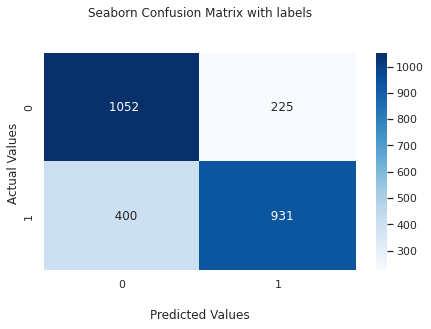

In [166]:
# Predicao
predicao_regresao_logistica = modelo_regressao_logistica.predict(validation_x)

trabalhar_com_matriz_de_confusao("Regressão Logística", validation_y, predicao_regresao_logistica)

# Analisar Resultados
print()
print(classification_report(validation_y, predicao_regresao_logistica))

Modelo 2 - Árvore de Decisão

In [130]:
# Treinamento
modelo_arvore_de_decisao = DecisionTreeClassifier(min_samples_split=30)
modelo_arvore_de_decisao.fit(train_x, train_y)


# KFolds
scores_modelo_kfold("Árvore de Decisão", modelo_arvore_de_decisao, train_x, train_y)

Árvore de Decisão
Acurácia (Desvio Padrão)
Acurácia Árvore de Decisão : 0.752 (0.014)
F-Measure Árvore de Decisão : 0.750 (0.018)


Matriz de Confusão Árvore de Decisão
Árvore de Decisão
Acurácia: 0.752
Acertos em 0(Não Transportado): 0.751
Acertos em 1(Transportado): 0.754


              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      1277
         1.0       0.76      0.75      0.76      1331

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.75      2608
weighted avg       0.75      0.75      0.75      2608



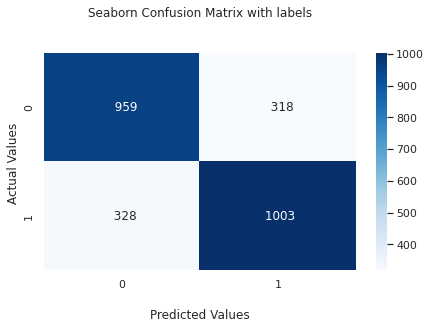

In [167]:
# Predição
predicao_arvore_de_decisao = modelo_arvore_de_decisao.predict(validation_x)

trabalhar_com_matriz_de_confusao("Árvore de Decisão", validation_y, predicao_arvore_de_decisao)

# Analisar Resultados
print()
print(classification_report(validation_y, predicao_arvore_de_decisao))

Modelo 3 - Random Forest

In [132]:
# Treinamento
modelo_random_forest = RandomForestClassifier(n_estimators=110)
modelo_random_forest.fit(train_x, train_y)

#Kfolds
scores_modelo_kfold("Random Forest", modelo_random_forest, train_x, train_y)

Random Forest
Acurácia (Desvio Padrão)
Acurácia Random Forest : 0.789 (0.013)
F-Measure Random Forest : 0.780 (0.009)


Matriz de Confusão Random Forest
Random Forest
Acurácia: 0.794
Acertos em 0(Não Transportado): 0.812
Acertos em 1(Transportado): 0.777


              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      1277
         1.0       0.81      0.78      0.79      1331

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



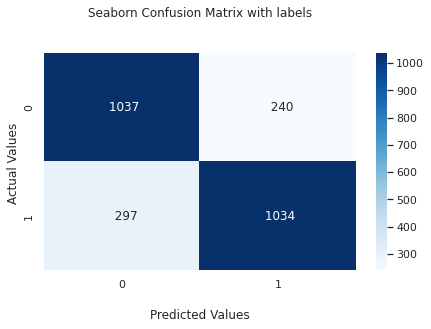

In [168]:
# Predicao
predicao_random_forest = modelo_random_forest.predict(validation_x)

trabalhar_com_matriz_de_confusao("Random Forest", validation_y, predicao_random_forest)

# Analisar Resultados
print()
print(classification_report(validation_y, predicao_random_forest))

Modelo 4 - Naive Bayes -> GaussianNB

In [134]:
# Treinamento
modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(train_x, train_y)

#Kfolds
scores_modelo_kfold("Naive Bayes Gaussian", modelo_naive_bayes, train_x, train_y)

Naive Bayes Gaussian
Acurácia (Desvio Padrão)
Acurácia Naive Bayes Gaussian : 0.736 (0.018)
F-Measure Naive Bayes Gaussian : 0.772 (0.020)


Matriz de Confusão Naive Bayes
Naive Bayes
Acurácia: 0.735
Acertos em 0(Não Transportado): 0.561
Acertos em 1(Transportado): 0.902


              precision    recall  f1-score   support

         0.0       0.85      0.56      0.68      1277
         1.0       0.68      0.90      0.78      1331

    accuracy                           0.74      2608
   macro avg       0.76      0.73      0.73      2608
weighted avg       0.76      0.74      0.73      2608



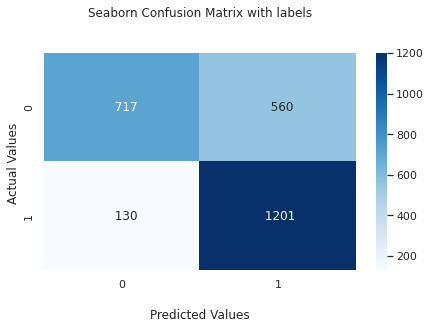

In [169]:
# Predicao
predicao_naive_bayes = modelo_naive_bayes.predict(validation_x)

trabalhar_com_matriz_de_confusao("Naive Bayes", validation_y, predicao_naive_bayes)

# Analisar Resultados
print()
print(classification_report(validation_y, predicao_naive_bayes))

Modelo 5 - KNN

In [136]:
# Treinamento
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(train_x, train_y)

#Kfolds
scores_modelo_kfold("KNN", modelo_knn, train_x, train_y)

KNN
Acurácia (Desvio Padrão)
Acurácia KNN : 0.745 (0.009)
F-Measure KNN : 0.739 (0.015)


Matriz de Confusão KNN
KNN
Acurácia: 0.743
Acertos em 0(Não Transportado): 0.76
Acertos em 1(Transportado): 0.727


              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74      1277
         1.0       0.76      0.73      0.74      1331

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608



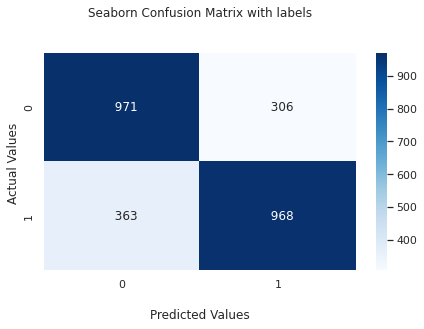

In [170]:
#Predição
predicao_knn = modelo_knn.predict(validation_x)
trabalhar_com_matriz_de_confusao("KNN", validation_y, predicao_knn)

# Analisar Resultados
print()
print(classification_report(validation_y, predicao_knn))

Modelo 6 - SVM

In [139]:
# Treinamento

# Definir Parâmetros
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
modelo_svm = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, cv=2 )
modelo_svm.fit(train_x, train_y)


#Kfolds
scores_modelo_kfold("SVM", modelo_svm, train_x, train_y)


Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time=   7.8s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.715 total time=   2.5s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   2.5s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   2.4s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.722 total time=   3.2s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   3.3s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.501 total time=   3.5s
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.501 total time=   3.5s
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.501 total time=   3.5s
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.501 total time=   3.4s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.751 total time=   2.3s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;

In [140]:
# Printar os Melhores Parâmetros e Estimadores
print(modelo_svm.best_params_)
print(modelo_svm.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1, probability=True)


Matriz de Confusão SVM
SVM
Acurácia: 0.783
Acertos em 0(Não Transportado): 0.786
Acertos em 1(Transportado): 0.78


              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1277
         1.0       0.79      0.78      0.79      1331

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



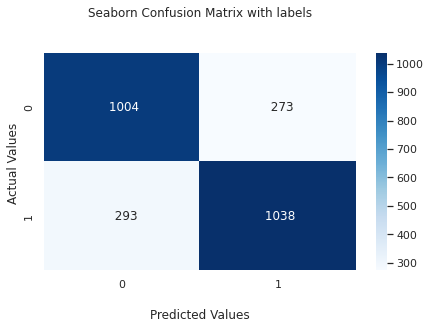

In [171]:
# Predicao
predicao_svm = modelo_svm.predict(validation_x)

trabalhar_com_matriz_de_confusao("SVM", validation_y, predicao_svm)

# Analisar Resultados
print()
print(classification_report(validation_y, predicao_svm))

# Modelo Extra - Rede Neural

Importações

In [142]:
import os
import cv2
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import  Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import model_selection

In [143]:
train_x.shape

(6085, 21)

In [144]:
# Montar Modelo
FEATURES = train_x.shape[1]
modelo_rede_neural = models.Sequential()

modelo_rede_neural.add(layers.InputLayer(input_shape=FEATURES))
modelo_rede_neural.add(layers.Dense(32,
                 activation='relu'))
modelo_rede_neural.add(layers.Dropout(0.5))

"""
model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'))

model1.add(layers.Dropout(0.5))"""


modelo_rede_neural.add(layers.Dense(2, activation='softmax', name='CamadaClassificacao'))
                       
modelo_rede_neural.summary()

# Compilar
modelo_rede_neural.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Treinar
modelo_rede_neural.fit(train_x, train_y, validation_data=(validation_x, validation_y), epochs=1000)

# Predição
#Obter Resultados
y_pred = modelo_rede_neural.predict(validation_x, verbose=1)
predicao_rede_neural = np.argmax(y_pred, axis=1)

print(list(predicao_rede_neural))

Epoch 1/1000
191/191 [==============================] - 3s 4ms/step - loss: 0.6552 - accuracy: 0.6191 - val_loss: 0.5782 - val_accuracy: 0.7117
Epoch 2/1000
191/191 [==============================] - 1s 3ms/step - loss: 0.5847 - accuracy: 0.7009 - val_loss: 0.5544 - val_accuracy: 0.7201
Epoch 3/1000
191/191 [==============================] - 1s 5ms/step - loss: 0.5632 - accuracy: 0.7190 - val_loss: 0.5408 - val_accuracy: 0.7289
Epoch 4/1000
191/191 [==============================] - 1s 6ms/step - loss: 0.5481 - accuracy: 0.7267 - val_loss: 0.5302 - val_accuracy: 0.7304
Epoch 5/1000
191/191 [==============================] - 1s 3ms/step - loss: 0.5364 - accuracy: 0.7338 - val_loss: 0.5215 - val_accuracy: 0.7423
Epoch 6/1000
191/191 [==============================] - 1s 3ms/step - loss: 0.5239 - accuracy: 0.7415 - val_loss: 0.5130 - val_accuracy: 0.7469
Epoch 7/1000
191/191 [==============================] - 1s 3ms/step - loss: 0.5153 - accuracy: 0.7431 - val_loss: 0.5063 - val_accuracy:

Matriz de Confusão Rede Neural
Rede Neural
Acurácia: 0.791
Acertos em 0(Não Transportado): 0.785
Acertos em 1(Transportado): 0.796


              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1277
         1.0       0.79      0.80      0.80      1331

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



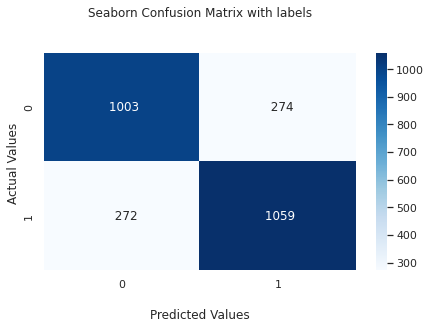

In [175]:
#Predicao
trabalhar_com_matriz_de_confusao("Rede Neural", validation_y, predicao_rede_neural)

print()
print(classification_report(validation_y, predicao_rede_neural))

# Análise dos Modelos

In [146]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
import time

In [147]:
# Guardar Modelos
modelos = [modelo_regressao_logistica, modelo_arvore_de_decisao, modelo_random_forest, modelo_naive_bayes, modelo_knn, modelo_svm, modelo_rede_neural]
nomes_dos_modelos = ["Regressão Logística", "Árvore de Decisão", "Random Forest", "Naive Bayes", "KNN", "SVM", "Rede Neural"]

Predição - Curva ROC

In [148]:
def plot_roc_curve(modelos, nomes_dos_modelos, validation_x, validation_y):
  data = []
  for modelo in modelos[:-1]:
    # Estimando as probabilidades
    prob = modelo.predict_proba(validation_x)
    probs = prob[:, 1]
    rfp, rvp,lim = roc_curve(validation_y, probs)
    data.append((rfp, rvp,lim))
  
  #Adicionar Probabilidade da Rede Neural
  prob = modelos[-1].predict(validation_x)
  probs = prob[:, 1]
  rfp, rvp,lim = roc_curve(validation_y, probs)
  data.append((rfp, rvp,lim))

  f = plt.figure() 
  f.set_figwidth(15) 
  f.set_figheight(15) 
  
  # Gráfico da curva roc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  pyplot.plot([0, 1], [0, 1], linestyle='--')

  for i, dado in enumerate(data):   
    pyplot.plot(dado[0], dado[1], marker='.', label=nomes_dos_modelos[i])      
  

  
  # Legenda
  pyplot.legend()
  # Mostrando o gráfico
  pyplot.show()

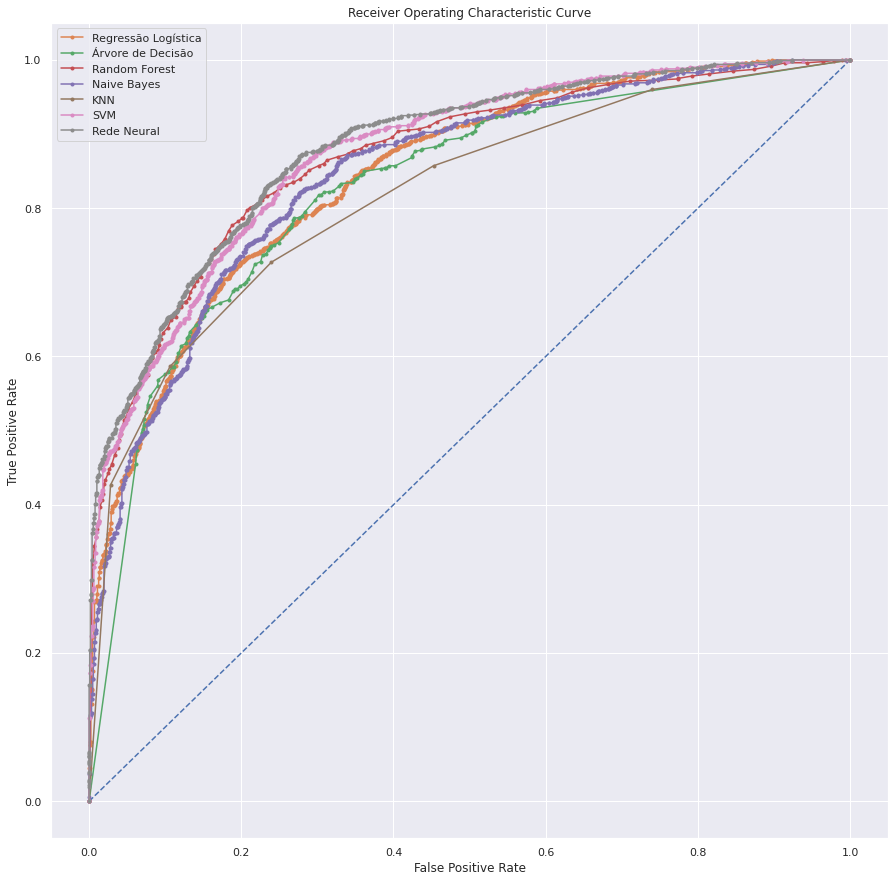

In [149]:
 plot_roc_curve(modelos, nomes_dos_modelos, validation_x, validation_y)

In [150]:
#Áreas das curvas ROC
scores = []
print("Área abaixo da curva ROC da maior para a menor")
for modelo in modelos[:-1]:
    # Estimando as probabilidades
    y_pred = modelo.predict(validation_x)   
    score = roc_auc_score(validation_y, y_pred)
    scores.append(score)

#Rede Neural
y_pred = modelos[-1].predict(validation_x)
y_pred = np.argmax(y_pred, axis=1)
score = roc_auc_score(validation_y, y_pred)

scores.append(score)
modelos_scores = list(zip(nomes_dos_modelos,scores))
modelos_scores.sort(key=lambda x: x[1], reverse=True)

for model in modelos_scores:
  print(model)

Área abaixo da curva ROC da maior para a menor
('Random Forest', 0.7944595093096553)
('Rede Neural', 0.7905384932637599)
('SVM', 0.7830412305324451)
('Regressão Logística', 0.7616399372355027)
('Árvore de Decisão', 0.7522738009998311)
('KNN', 0.7438243041218765)
('Naive Bayes', 0.731900638176323)


Analisando a área debaixo do gráfico, Random Forest foi o melhor classificador e Naive Bayes o pior.

Desempenho

In [151]:
#Calcular os tempos
def calcular_tempos(modelos, nomes_dos_modelos, validation_x):
  tempos = dict()
  for i, modelo in enumerate(modelos):
    tempo_inicial = time.time()
    tempos[nomes_dos_modelos[i]] = []
    for data in validation_x:
      modelo.predict(data.reshape(1,-1))
      tempos[nomes_dos_modelos[i]].append(time.time()-tempo_inicial)
  return tempos


def plotar_tempos(tempos):
  # Gráfico dos tempos
  f = plt.figure() 
  f.set_figwidth(12) 
  f.set_figheight(12) 
  plt.xlabel('Número de Instâncias da Base de Validação')
  plt.ylabel('Tempo de CPU')
  plt.title('Análise de Escalabilidade')
 
  for nome_modelo, tempo in tempos.items():
    pyplot.plot(range(len(tempo)), tempo, label=nome_modelo)    
  plt.xscale("log")
  plt.yscale("log")
  # Legenda
  pyplot.legend()
  # Mostrando o gráfico
  pyplot.show()

In [152]:
tempos = calcular_tempos(modelos, nomes_dos_modelos, validation_x)

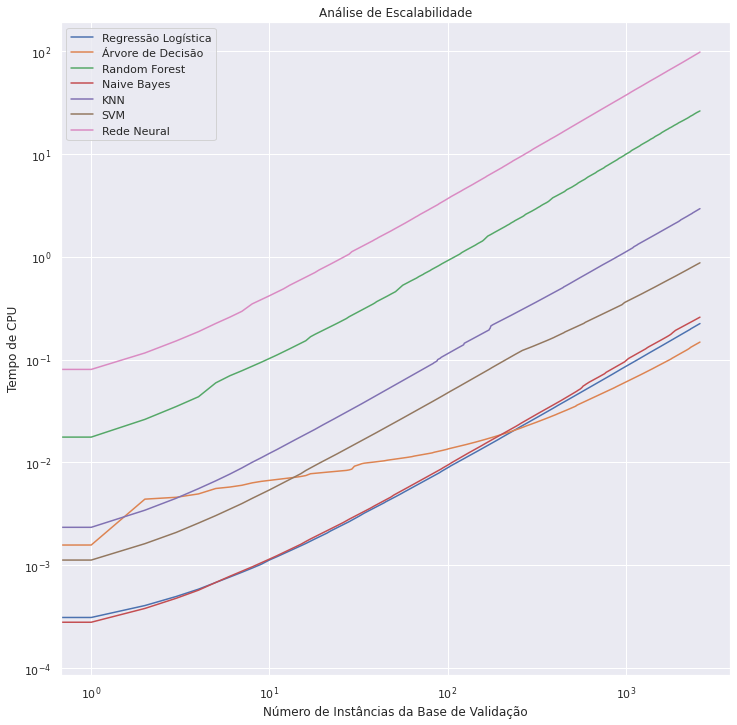

In [153]:
 plotar_tempos(tempos)

In [162]:
# Imprimir do mais lento para o mais rápido
for tempo in sorted(list(tempos.items()), key=lambda x:x[1][-1], reverse=True):
  print(tempo[0], round(tempo[1][-1], 2), "sec")

Rede Neural 97.41 sec
Random Forest 26.07 sec
KNN 2.93 sec
SVM 0.87 sec
Naive Bayes 0.26 sec
Regressão Logística 0.22 sec
Árvore de Decisão 0.15 sec


A Rede Neural gasta mais tempo para classificar as instâncias enquanto a Árvore de Decisão gasta menos.

#Gerar Arquivo de predição do Kaggle

In [180]:
new_df = pd.read_csv("test.csv")

y_pred = modelo_rede_neural.predict(test_x, verbose=1)
predicao_rede_neural = np.argmax(y_pred, axis=1)

output = pd.DataFrame(new_df["PassengerId"])
output["Transported"] =  predicao_rede_neural
output["Transported"] = [bool(i) for i in list(predicao_rede_neural)]


output.to_csv('submissionRedeNeural.csv', index=False, header=True)
print("Predictions Saved")

134/134 [==============================] - 0s 1ms/step
Predictions Saved


In [181]:
for i, modelo in enumerate(modelos[:-1]):
  y_pred = modelo.predict(test_x)

  output = pd.DataFrame(new_df["PassengerId"])
  output["Transported"] = [bool(i) for i in list(y_pred)]

  output.to_csv('submission' + nomes_dos_modelos[i] + '.csv', index=False, header=True)
  print("Predictions Saved")

Predictions Saved
Predictions Saved
Predictions Saved
Predictions Saved
Predictions Saved
Predictions Saved


# Resultados no Kaggle

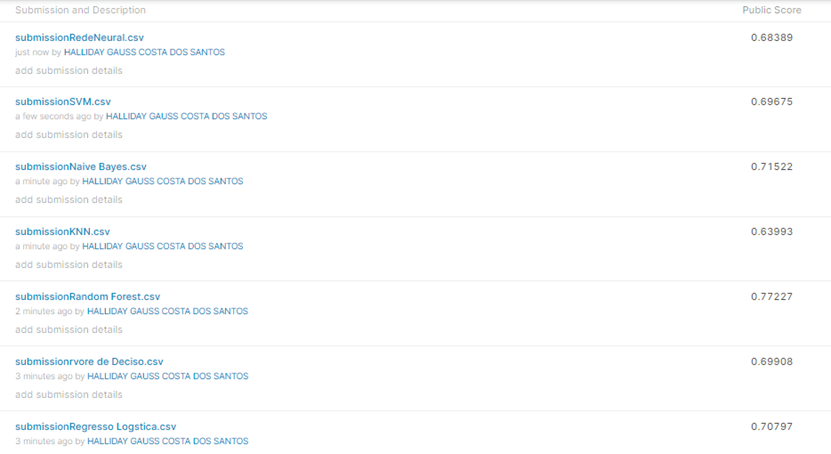

Após a submissão no Kaggle, é possível perceber que:
 
 - Random Forest foi o melhor classificador com 77,23% de acurácia.
 - KNN foi o pior classificador com 63,99% de acurácia.

Obs: O melhor resultado no Kaggle é de 87%